# TELECOM CHURN CASE STUDY

## Study group: Sharmishtha Tikam, Shruti Sinha, Saniya Rahil Dhuka

## Problem Statement: 
    

### In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition. For many incumbent operators, retaining high profitable customers is the number one business goal. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. In this project, analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

## Definition of churn and high-value customers: 

### Usage-based churn: Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time. A potential shortcoming of this definition is that when the customer has stopped using the services for a while, it may be too late to take any corrective actions to retain them.

### In this project, you will define high-value customers based on those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase). Predict churn only on high-value customers.

## Business Objective:
### The dataset contains customer-level information for a span of four consecutive months - June, July, August and September. The months are encoded as 6, 7, 8 and 9, respectively. 

### The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. To do this task well, understanding the typical customer behaviour during churn will be helpful.

## Understanding customer behaviour during churn
### Customers usually do not decide to switch to another competitor instantly, but rather over a period of time (this is especially applicable to high-value customers). In churn prediction, we assume that there are three phases of the customer lifecycle :

### The ‘good’ phase: In this phase, the customer is happy with the service and behaves as usual.

### The ‘action’ phase: The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than in the ‘good’ months. Also, it is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)

### The ‘churn’ phase: In this phase, the customer is said to have churned. You define churn based on this phase. Also, it is important to note that at the time of prediction (i.e. the action months), this data is not available to you for prediction. Thus, after tagging churn as 1/0 based on this phase, you discard all data corresponding to this phase.

### In this case, since you are working over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, and the fourth month is the ‘churn’ phase.

### Following steps are involved in the buisness case study.
#### 1) Import libraries
#### 2) Reading and Understanding the Data
#### 3) Data cleaning
#### 4) Exploratory data analysis / Data visualization
#### 5) Preparation for model building
#### 6) Model building and evaluation
#### 7) Model selection
#### 8) Prediction
#### 9) Conclusion

## 1) Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import sklearn.preprocessing
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

## 2) Reading and Understanding the Data¶

In [2]:
tele_df=pd.read_csv('telecom_churn_data (1).csv')
tele_df.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

In [3]:
tele_df.shape

(99999, 226)

In [4]:
tele_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [5]:
tele_df.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   9.999900e+04    99999.0         98981.0         98981.0   
mean    7.001207e+09      109.0             0.0             0.0   
std     6.956694e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000606e+09      109.0             0.0             0.0   
50%     7.001205e+09      109.0             0.0             0.0   
75%     7.001812e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         98981.0  99999.000000  99999.000000  99999.000000  99999.000000   
mean              0.0    282.987358    278.536648    279.154731    261.645069   
std               0.0    328.439770    338.156291    344.474791    341.998630   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%               0.0     93.411500     86.980500     84.126000     62.685000   
50%               0.0    197.704000    191.640000    192.080000    176.849000   
75%               0.0    371.060000    365.344500    369.370500    353.466500   
max               0.0  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6   onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  \
count  96062.000000  96140.000000  94621.000000  92254.000000  96062.000000   
mean     132.395875    133.670805    133.018098    130.302327    197.935577   
std      297.207406    308.794148    308.951589    308.477668    316.851613   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        7.380000      6.660000      6.460000      5.330000     34.730000   
50%       34.310000     32.330000     32.360000     29.840000     96.310000   
75%      118.740000    115.595000    115.860000    112.130000    231.860000   
max     7376.710000   8157.780000  10752.560000  10427.460000   8362.360000   

       offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  96140.000000  94621.000000  92254.000000   96062.000000   96140.000000   
mean     197.045133    196.574803    190.337222       9.950013       7.149898   
std      325.862803    327.170662    319.396092      72.825411      73.447948   
min        0.000000      0.000000      0.000000       0.000000       0.000000   
25%       32.190000     31.630000     27.130000       0.000000       0.000000   
50%       91.735000     92.140000     87.290000       0.000000       0.000000   
75%      226.815000    228.260000    220.505000       0.000000       0.000000   
max     9667.130000  14007.340000  10310.760000   13724.380000   15371.040000   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count   94621.000000   92254.000000   96062.000000   96140.000000   
mean        7.292981       6.343841      13.911337       9.818732   
std        68.402466      57.137537      71.443196      58.455762   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max     13095.360000    8464.030000    3775.110000    2812.040000   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   94621.000000   92254.000000      96062.000000      96140.000000   
mean        9.971890       8.555519         47.100763         46.473010   
std        64.713221      58.438186        150.856393        155.318705   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          1.660000          1.630000   
50%         0.000000       0.000000         11.910000         11.610000   
75%         0.000000       0.000000         40.960000         39.910000   
max      

#### The buisness objective is to define high-value customers based on those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase). Predict churn only on high-value customers.

In [6]:
# Calculating the 70th percentile of average total recharge amount for 6 and 7 months

avg = (tele_df['total_rech_amt_6']+tele_df['total_rech_amt_7'])/2
per_70 = np.percentile(avg , 70)
per_70

368.5

### Filtering high-value customers

In [7]:
#Now, only use high-value customers
tele_df_high = tele_df[avg >= per_70]
tele_df_high.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
7      7000701601        109             0.0             0.0             0.0   
8      7001524846        109             0.0             0.0             0.0   
13     7002191713        109             0.0             0.0             0.0   
16     7000875565        109             0.0             0.0             0.0   
17     7000187447        109             0.0             0.0             0.0   

   last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
7             6/30/2014            7/31/2014            8/31/2014   
8             6/30/2014            7/31/2014            8/31/2014   
13            6/30/2014            7/31/2014            8/31/2014   
16            6/30/2014            7/31/2014            8/31/2014   
17            6/30/2014            7/31/2014            8/31/2014   

   last_date_of_month_9    arpu_6    arpu_7    arpu_8   arpu_9  onnet_mou_6  \
7             9/30/2014  1069.180  1349.850  3171.480  500.000        57.84   
8             9/30/2014   378.721   492.223   137.362  166.787       413.69   
13            9/30/2014   492.846   205.671   593.260  322.732       501.76   
16            9/30/2014   430.975   299.869   187.894  206.490        50.51   
17            9/30/2014   690.008    18.980    25.499  257.583      1185.91   

    onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
7         54.68        52.29          NaN        453.43        567.16   
8        351.03        35.08        33.46         94.66         80.63   
13       108.39       534.24       244.81        413.31        119.28   
16        74.01        70.61        31.34        296.29        229.74   
17         9.28         7.79       558.51         61.64          0.00   

    offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
7         325.91           NaN          16.23          33.49          31.64   
8         136.48        108.71           0.00           0.00           0.00   
13        482.46        214.06          23.53         144.24          72.11   
16        162.76        224.39           0.00           2.83           0.00   
17          5.54         87.89           0.00           4.76           4.81   

    roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
7             NaN          23.74          12.59          38.06            NaN   
8            0.00           0.00           0.00           0.00           0.00   
13         136.78           7.98          35.26           1.44          12.78   
16           0.00           0.00          17.74           0.00           0.00   
17           0.00           0.00           8.46          13.34          17.98   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
7              51.39             31.38             40.28               NaN   
8             297.13            217.59             12.49             26.13   
13             49.63              6.19             36.01              6.14   
16             42.61             65.16             67.38             26.88   
17             38.99              0.00              0.00             36.41   

    loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
7             308.63            447.38            162.28               NaN   
8              80.96             70.58             50.54             34.58   
13            151.13             47.28            294.46            108.24   
16            273.29            145.99            128.28            201.49   
17             58.54              0.00              0.00              9.38   

    loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
7              62.13             55.14             53.23               NaN   
8               0.00              0.00              0.00              0.00   
13              4.54              0.00             23.51    

In [8]:
tele_df_high.shape

(30011, 226)

## 3) Data cleaning

In [9]:
#Check for missing values

tele_df_high.isna().sum()

mobile_number                   0
circle_id                       0
loc_og_t2o_mou                114
std_og_t2o_mou                114
loc_ic_t2o_mou                114
last_date_of_month_6            0
last_date_of_month_7           31
last_date_of_month_8          157
last_date_of_month_9          360
arpu_6                          0
arpu_7                          0
arpu_8                          0
arpu_9                          0
onnet_mou_6                   316
onnet_mou_7                   303
onnet_mou_8                   938
onnet_mou_9                  1704
offnet_mou_6                  316
offnet_mou_7                  303
offnet_mou_8                  938
offnet_mou_9                 1704
roam_ic_mou_6                 316
roam_ic_mou_7                 303
roam_ic_mou_8                 938
roam_ic_mou_9                1704
roam_og_mou_6                 316
roam_og_mou_7                 303
roam_og_mou_8                 938
roam_og_mou_9                1704
loc_og_t2t_mou

In [10]:
missing=round(100*(tele_df_high.isna().sum()/len(tele_df_high))).sort_values(ascending=False)
missing

arpu_3g_9                   62.0
fb_user_6                   62.0
night_pck_user_6            62.0
arpu_2g_9                   62.0
max_rech_data_9             62.0
count_rech_2g_6             62.0
night_pck_user_9            62.0
total_rech_data_6           62.0
date_of_last_rech_data_9    62.0
max_rech_data_6             62.0
count_rech_3g_6             62.0
count_rech_2g_9             62.0
arpu_2g_6                   62.0
date_of_last_rech_data_6    62.0
arpu_3g_6                   62.0
count_rech_3g_9             62.0
fb_user_9                   62.0
av_rech_amt_data_6          62.0
av_rech_amt_data_9          62.0
total_rech_data_9           62.0
date_of_last_rech_data_7    61.0
date_of_last_rech_data_8    61.0
arpu_2g_7                   61.0
arpu_2g_8                   61.0
arpu_3g_7                   61.0
arpu_3g_8                   61.0
total_rech_data_7           61.0
total_rech_data_8           61.0
max_rech_data_7             61.0
fb_user_7                   61.0
av_rech_am

#### There are so many columns with high missing values so let us remove the features with more than 50% missing values.

In [11]:
missing_50 = ['date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','date_of_last_rech_data_9',
                'total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9','max_rech_data_6',
                'max_rech_data_7','max_rech_data_8','max_rech_data_9','count_rech_2g_6','count_rech_2g_7','count_rech_2g_8',
                'count_rech_2g_9','count_rech_3g_6','count_rech_3g_7','count_rech_3g_8','count_rech_3g_9','av_rech_amt_data_6',
                'av_rech_amt_data_7','av_rech_amt_data_8','av_rech_amt_data_9','arpu_3g_6','arpu_3g_7','arpu_3g_8','arpu_3g_9',
                'arpu_2g_6','arpu_2g_7','arpu_2g_8','arpu_2g_9','night_pck_user_6','night_pck_user_7','night_pck_user_8',
                'night_pck_user_9','fb_user_6','fb_user_7','fb_user_8','fb_user_9']

tele_df_high.drop(missing_50,inplace=True,axis=1)

In [12]:
tele_df_high.shape

(30011, 186)

### Find the churned customers

In [13]:
# lets check the columns unique values and drop such columns with its value as 1
unique_col=[]
for i in tele_df.columns:
    if tele_df[i].nunique() == 1:
        unique_col.append(i)
    else:
        pass

tele_df.drop(unique_col, axis=1, inplace = True)
print("\n The following columns have unique value 1 means these columns do not have variance in the model\n",
      unique_col)


 The following columns have unique value 1 means these columns do not have variance in the model
 ['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_t2c_mou_9', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9']


Tag the churned customers as churn=1 and no churn=0 based on the fourth month as per the following definition: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. Use the following attributes to tag churners:

total_ic_mou_9

total_og_mou_9

vol_2g_mb_9

vol_3g_mb_9

In [14]:
def churn(tag):
    if tag['total_ic_mou_9'] == 0 or tag['total_og_mou_9'] == 0 and tag['vol_2g_mb_9'] == 0 and tag['vol_3g_mb_9'] == 0:
        return 1
    else:
        return 0
    
tele_df_high['churn']  = tele_df_high.apply(churn,axis=1)

In [15]:
tele_df_high.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
7      7000701601        109             0.0             0.0             0.0   
8      7001524846        109             0.0             0.0             0.0   
13     7002191713        109             0.0             0.0             0.0   
16     7000875565        109             0.0             0.0             0.0   
17     7000187447        109             0.0             0.0             0.0   

   last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
7             6/30/2014            7/31/2014            8/31/2014   
8             6/30/2014            7/31/2014            8/31/2014   
13            6/30/2014            7/31/2014            8/31/2014   
16            6/30/2014            7/31/2014            8/31/2014   
17            6/30/2014            7/31/2014            8/31/2014   

   last_date_of_month_9    arpu_6    arpu_7    arpu_8   arpu_9  onnet_mou_6  \
7             9/30/2014  1069.180  1349.850  3171.480  500.000        57.84   
8             9/30/2014   378.721   492.223   137.362  166.787       413.69   
13            9/30/2014   492.846   205.671   593.260  322.732       501.76   
16            9/30/2014   430.975   299.869   187.894  206.490        50.51   
17            9/30/2014   690.008    18.980    25.499  257.583      1185.91   

    onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
7         54.68        52.29          NaN        453.43        567.16   
8        351.03        35.08        33.46         94.66         80.63   
13       108.39       534.24       244.81        413.31        119.28   
16        74.01        70.61        31.34        296.29        229.74   
17         9.28         7.79       558.51         61.64          0.00   

    offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
7         325.91           NaN          16.23          33.49          31.64   
8         136.48        108.71           0.00           0.00           0.00   
13        482.46        214.06          23.53         144.24          72.11   
16        162.76        224.39           0.00           2.83           0.00   
17          5.54         87.89           0.00           4.76           4.81   

    roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
7             NaN          23.74          12.59          38.06            NaN   
8            0.00           0.00           0.00           0.00           0.00   
13         136.78           7.98          35.26           1.44          12.78   
16           0.00           0.00          17.74           0.00           0.00   
17           0.00           0.00           8.46          13.34          17.98   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
7              51.39             31.38             40.28               NaN   
8             297.13            217.59             12.49             26.13   
13             49.63              6.19             36.01              6.14   
16             42.61             65.16             67.38             26.88   
17             38.99              0.00              0.00             36.41   

    loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
7             308.63            447.38            162.28               NaN   
8              80.96             70.58             50.54             34.58   
13            151.13             47.28            294.46            108.24   
16            273.29            145.99            128.28            201.49   
17             58.54              0.00              0.00              9.38   

    loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
7              62.13             55.14             53.23               NaN   
8               0.00              0.00              0.00              0.00   
13              4.54              0.00             23.51    

In [16]:
## Churn rate:

churn = (sum(tele_df_high['churn'])/len(tele_df_high['churn'].index))*100
churn

10.51281196894472

In [17]:
print(tele_df_high.columns.tolist())

['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6', 'arpu_7', 'arpu_8', 'arpu_9', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'offnet_mou_9', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_ic_mou_9', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'roam_og_mou_9', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_t2c_mou_9', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'loc_og_mou_9', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2t_mou_9', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou

The 'churn' column is created now so all the columns for 9 th month can be drop.

In [18]:
column_9 = ['last_date_of_month_9','arpu_9','onnet_mou_9','offnet_mou_9','roam_ic_mou_9','roam_og_mou_9','loc_og_t2t_mou_9',
             'loc_og_t2m_mou_9','loc_og_t2f_mou_9','loc_og_t2c_mou_9','loc_og_mou_9','std_og_t2t_mou_9','std_og_t2m_mou_9',
             'std_og_t2f_mou_9','std_og_t2c_mou_9','std_og_mou_9','isd_og_mou_9','spl_og_mou_9','og_others_9','total_og_mou_9',
             'loc_ic_t2t_mou_9','loc_ic_t2m_mou_9','loc_ic_t2f_mou_9','loc_ic_mou_9','std_ic_t2t_mou_9','std_ic_t2m_mou_9',
             'std_ic_t2f_mou_9','std_ic_t2o_mou_9','std_ic_mou_9','total_ic_mou_9','spl_ic_mou_9','isd_ic_mou_9','ic_others_9',
             'total_rech_num_9','total_rech_amt_9','max_rech_amt_9','date_of_last_rech_9','last_day_rch_amt_9','vol_2g_mb_9',
             'vol_3g_mb_9','monthly_2g_9','sachet_2g_9','monthly_3g_9','sachet_3g_9']

tele_df_high.drop(column_9,inplace=True,axis=1)

In [19]:
print(tele_df_high.columns.tolist())

['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mo

We can remove the date columns here as those are not significant.

In [20]:
column_date = ['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8','date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8']
tele_df_high.drop(column_date,inplace=True,axis=1)

In the dataframe there are features for the total of all local, std and isd incoming and outgoing Minutes of usage(MOU) so no need of the columns T2T, T2M, T2O, T2F, T2C. Also, we dont need total incoming and total outgoing MOU as we are using the same data in total of all local, std and isd incoming and outgoing MOU. 

In [21]:
column_mou = ['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou','loc_og_t2t_mou_6', 'loc_og_t2t_mou_7',
                  'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 
                  'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
                  'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 
                  'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2c_mou_6', 
                  'std_og_t2c_mou_7', 'std_og_t2c_mou_8','total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8',
                  'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 
                  'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8','std_ic_t2t_mou_6', 
                  'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8', 
                  'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 
                  'std_ic_t2o_mou_8','total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8']
tele_df_filter = tele_df_high.drop(column_mou, axis=1)

In [22]:
tele_df_filter.shape

(30011, 80)

In [23]:
# Observe that some monthly features are not in standard naming convention (_6,_7,_8,_9)
# Rename column as per standard:
#'jun_vbc_3g' : 'vbc_3g_6', 'jul_vbc_3g' : 'vbc_3g_7', 'aug_vbc_3g' : 'vbc_3g_8', 'sep_vbc_3g' : 'vbc_3g_9'

tele_df_filter.rename(columns={'jun_vbc_3g' : 'vbc_3g_6', 'jul_vbc_3g' : 'vbc_3g_7', 'aug_vbc_3g' : 'vbc_3g_8',
                      'sep_vbc_3g' : 'vbc_3g_9'}, inplace=True)

Finally, drop the column 'vbc_3g_9' as it is for the 9th month that contributes for the 'churn' variable.

In [24]:
tele_df_filter = tele_df_filter.drop('vbc_3g_9', axis=1)

In [25]:
tele_df_filter.shape

(30011, 79)

In [26]:
print(tele_df_filter.columns.tolist())

['mobile_number', 'circle_id', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7', 'og_others_8', 'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8', 'spl_ic_mou_6', 'spl_ic_mou_7', 'spl_ic_mou_8', 'isd_ic_mou_6', 'isd_ic_mou_7', 'isd_ic_mou_8', 'ic_others_6', 'ic_others_7', 'ic_others_8', 'total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8', 'vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8', 'vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8', 'month

Now, create new features by combining columns for 2g and 3g features.

In [27]:
#First create a feature for total of 2g and 3g features for 'vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8', 'vol_3g_mb_6', 'vol_3g_mb_7', and 'vol_3g_mb_8'.

tele_df_filter['vol_mb_6'] = tele_df_filter['vol_2g_mb_6'] + tele_df_filter['vol_3g_mb_6']
tele_df_filter['vol_mb_7'] = tele_df_filter['vol_2g_mb_7'] + tele_df_filter['vol_3g_mb_7']
tele_df_filter['vol_mb_8'] = tele_df_filter['vol_2g_mb_8'] + tele_df_filter['vol_3g_mb_8']

In [28]:
#Create a feature for total of 2g and 3g features 'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'monthly_3g_6', 'monthly_3g_7', and 'monthly_3g_8'. 

tele_df_filter['monthly_6'] = tele_df_filter['monthly_2g_6'] + tele_df_filter['monthly_3g_6']
tele_df_filter['monthly_7'] = tele_df_filter['monthly_2g_7'] + tele_df_filter['monthly_3g_7']
tele_df_filter['monthly_8'] = tele_df_filter['monthly_2g_8'] + tele_df_filter['monthly_3g_8']

In [29]:
#Create a feature for total of 2g and 3g features 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 'sachet_3g_6', 'sachet_3g_7', and 'sachet_3g_8'

tele_df_filter['sachet_6'] = tele_df_filter['sachet_2g_6'] + tele_df_filter['sachet_3g_6']
tele_df_filter['sachet_7'] = tele_df_filter['sachet_2g_7'] + tele_df_filter['sachet_3g_7']
tele_df_filter['sachet_8'] = tele_df_filter['sachet_2g_8'] + tele_df_filter['sachet_3g_8']

In [30]:
## Now, remove the 2g and 3g feature columns.

columns_drop = ['vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8', 'vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8', 'monthly_2g_6',
                'monthly_2g_7', 'monthly_2g_8', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 'monthly_3g_6', 'monthly_3g_7',
                'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8']

tele_df_filter.drop(columns_drop, inplace=True, axis=1)

In [31]:
tele_df_filter.shape

(30011, 70)

In [32]:
## From the data notice that the circle_id does not play any role in model. Drop this feature.

tele_df_filter.drop('circle_id', inplace=True, axis=1)

In [33]:
# Check again for the missing values

print(100 * tele_df_filter.isna().sum() / len(tele_df_filter))

mobile_number       0.000000
arpu_6              0.000000
arpu_7              0.000000
arpu_8              0.000000
onnet_mou_6         1.052947
onnet_mou_7         1.009630
onnet_mou_8         3.125521
offnet_mou_6        1.052947
offnet_mou_7        1.009630
offnet_mou_8        3.125521
roam_ic_mou_6       1.052947
roam_ic_mou_7       1.009630
roam_ic_mou_8       3.125521
roam_og_mou_6       1.052947
roam_og_mou_7       1.009630
roam_og_mou_8       3.125521
loc_og_mou_6        1.052947
loc_og_mou_7        1.009630
loc_og_mou_8        3.125521
std_og_mou_6        1.052947
std_og_mou_7        1.009630
std_og_mou_8        3.125521
isd_og_mou_6        1.052947
isd_og_mou_7        1.009630
isd_og_mou_8        3.125521
spl_og_mou_6        1.052947
spl_og_mou_7        1.009630
spl_og_mou_8        3.125521
og_others_6         1.052947
og_others_7         1.009630
og_others_8         3.125521
loc_ic_mou_6        1.052947
loc_ic_mou_7        1.009630
loc_ic_mou_8        3.125521
std_ic_mou_6  

There are still few missing values in the  data set which needs to be removed.

In [34]:
# Removing missing values

tele_df_1 = tele_df_filter.dropna(how='any')

In [35]:
tele_df_1.shape

(28861, 69)

In [36]:
# Check again for the missing values

print(100 * tele_df_1.isna().sum() / len(tele_df_1))

mobile_number       0.0
arpu_6              0.0
arpu_7              0.0
arpu_8              0.0
onnet_mou_6         0.0
onnet_mou_7         0.0
onnet_mou_8         0.0
offnet_mou_6        0.0
offnet_mou_7        0.0
offnet_mou_8        0.0
roam_ic_mou_6       0.0
roam_ic_mou_7       0.0
roam_ic_mou_8       0.0
roam_og_mou_6       0.0
roam_og_mou_7       0.0
roam_og_mou_8       0.0
loc_og_mou_6        0.0
loc_og_mou_7        0.0
loc_og_mou_8        0.0
std_og_mou_6        0.0
std_og_mou_7        0.0
std_og_mou_8        0.0
isd_og_mou_6        0.0
isd_og_mou_7        0.0
isd_og_mou_8        0.0
spl_og_mou_6        0.0
spl_og_mou_7        0.0
spl_og_mou_8        0.0
og_others_6         0.0
og_others_7         0.0
og_others_8         0.0
loc_ic_mou_6        0.0
loc_ic_mou_7        0.0
loc_ic_mou_8        0.0
std_ic_mou_6        0.0
std_ic_mou_7        0.0
std_ic_mou_8        0.0
spl_ic_mou_6        0.0
spl_ic_mou_7        0.0
spl_ic_mou_8        0.0
isd_ic_mou_6        0.0
isd_ic_mou_7    

Now, since there are no missing values, lets move ahead with exploratory data analysis.

In [37]:
tele_df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28861 entries, 7 to 99997
Data columns (total 69 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mobile_number     28861 non-null  int64  
 1   arpu_6            28861 non-null  float64
 2   arpu_7            28861 non-null  float64
 3   arpu_8            28861 non-null  float64
 4   onnet_mou_6       28861 non-null  float64
 5   onnet_mou_7       28861 non-null  float64
 6   onnet_mou_8       28861 non-null  float64
 7   offnet_mou_6      28861 non-null  float64
 8   offnet_mou_7      28861 non-null  float64
 9   offnet_mou_8      28861 non-null  float64
 10  roam_ic_mou_6     28861 non-null  float64
 11  roam_ic_mou_7     28861 non-null  float64
 12  roam_ic_mou_8     28861 non-null  float64
 13  roam_og_mou_6     28861 non-null  float64
 14  roam_og_mou_7     28861 non-null  float64
 15  roam_og_mou_8     28861 non-null  float64
 16  loc_og_mou_6      28861 non-null  float6

## 4) Exploratory data analysis / Data visualization

There is no any categorical variable so no need to create the dummy variable.

In [38]:
tele_df_1.describe().T

count          mean            std           min  \
mobile_number     28861.0  7.001229e+09  681553.906393  7.000000e+09   
arpu_6            28861.0  5.835680e+02     429.891274 -2.258709e+03   
arpu_7            28861.0  5.945583e+02     461.750047 -2.014045e+03   
arpu_8            28861.0  5.482967e+02     488.668215 -9.458080e+02   
onnet_mou_6       28861.0  2.962722e+02     457.342129  0.000000e+00   
onnet_mou_7       28861.0  3.091639e+02     481.606078  0.000000e+00   
onnet_mou_8       28861.0  2.758678e+02     468.949151  0.000000e+00   
offnet_mou_6      28861.0  4.186329e+02     464.792017  0.000000e+00   
offnet_mou_7      28861.0  4.315887e+02     487.782977  0.000000e+00   
offnet_mou_8      28861.0  3.868623e+02     477.771854  0.000000e+00   
roam_ic_mou_6     28861.0  1.735069e+01      77.878036  0.000000e+00   
roam_ic_mou_7     28861.0  1.362236e+01      76.726764  0.000000e+00   
roam_ic_mou_8     28861.0  1.364193e+01      75.652346  0.000000e+00   
roam_og_mou_6     28861.0  2.912484e+01     117.664610  0.000000e+00   
roam_og_mou_7     28861.0  2.214101e+01      98.778058  0.000000e+00   
roam_og_mou_8     28861.0  2.214912e+01     108.024414  0.000000e+00   
loc_og_mou_6      28861.0  2.873802e+02     381.084720  0.000000e+00   
loc_og_mou_7      28861.0  2.915931e+02     379.197152  0.000000e+00   
loc_og_mou_8      28861.0  2.707809e+02     370.138580  0.000000e+00   
std_og_mou_6      28861.0  3.916925e+02     599.284073  0.000000e+00   
std_og_mou_7      28861.0  4.201742e+02     638.397664  0.000000e+00   
std_og_mou_8      28861.0  3.632841e+02     618.358872  0.000000e+00   
isd_og_mou_6      28861.0  2.067312e+00      45.365362  0.000000e+00   
isd_og_mou_7      28861.0  2.142616e+00      46.143857  0.000000e+00   
isd_og_mou_8      28861.0  2.034974e+00      45.439607  0.000000e+00   
spl_og_mou_6      28861.0  5.926283e+00      18.694921  0.000000e+00   
spl_og_mou_7      28861.0  7.534818e+00      23.305532  0.000000e+00   
spl_og_mou_8      28861.0  7.103449e+00      23.252251  0.000000e+00   
og_others_6       28861.0  6.879665e-01       2.277778  0.000000e+00   
og_others_7       28861.0  4.899484e-02       2.794869  0.000000e+00   
og_others_8       28861.0  6.148540e-02       3.385806  0.000000e+00   
loc_ic_mou_6      28861.0  2.473155e+02     309.531384  0.000000e+00   
loc_ic_mou_7      28861.0  2.540859e+02     317.689731  0.000000e+00   
loc_ic_mou_8      28861.0  2.428826e+02     309.677852  0.000000e+00   
std_ic_mou_6      28861.0  5.129228e+01     140.582632  0.000000e+00   
std_ic_mou_7      28861.0  5.447446e+01     151.393139  0.000000e+00   
std_ic_mou_8      28861.0  4.975596e+01     143.119429  0.000000e+00   
spl_ic_mou_6      28861.0  6.769620e-02       0.196430  0.000000e+00   
spl_ic_mou_7      28861.0  1.851079e-02       0.185266  0.000000e+00   
spl_ic_mou_8      28861.0  2.851738e-02       0.118322  0.000000e+00   
isd_ic_mou_6      28861.0  1.094104e+01      66.587780  0.000000e+00   
isd_ic_mou_7      28861.0  1.238532e+01      77.428697  0.000000e+00   
isd_ic_mou_8      28861.0  1.196582e+01      75.966141  0.000000e+00   
ic_others_6       28861.0  1.181635e+00      14.051132  0.000000e+00   
ic_others_7       28861.0  1.508592e+00      15.652311  0.000000e+00   
ic_others_8       28861.0  1.278569e+00      13.121805  0.000000e+00   
total_rech_num_6  28861.0  1.211060e+01       9.408377  0.000000e+00   
total_rech_num_7  28861.0  1.206770e+01       9.623649  0.000000e+00   
total_rech_num_8  28861.0  1.050168e+01       9.493648  0.000000e+00   
total_rech_amt_6  28861.0  6.935147e+02     527.560914  0.000000e+00   
total_rech_amt_7  28861.0  7.024347e+02     560.030217  0.000000e+00   
total_rech_amt_8  28861.0  6.294448e+02     598.630618  0.000000e+00   
max_rech_amt_6    28861.0  1.698925e+02     170.742266  0.000000e+00   
max_rech_amt_7    28861.0  1.745368e+02     175.386903  0.000000e+00   
max_rech_amt_8    28861.0  1.656799e+02     169.583291  0.00

### Plot a heatmap to check the multicolinearity.

<Axes: >

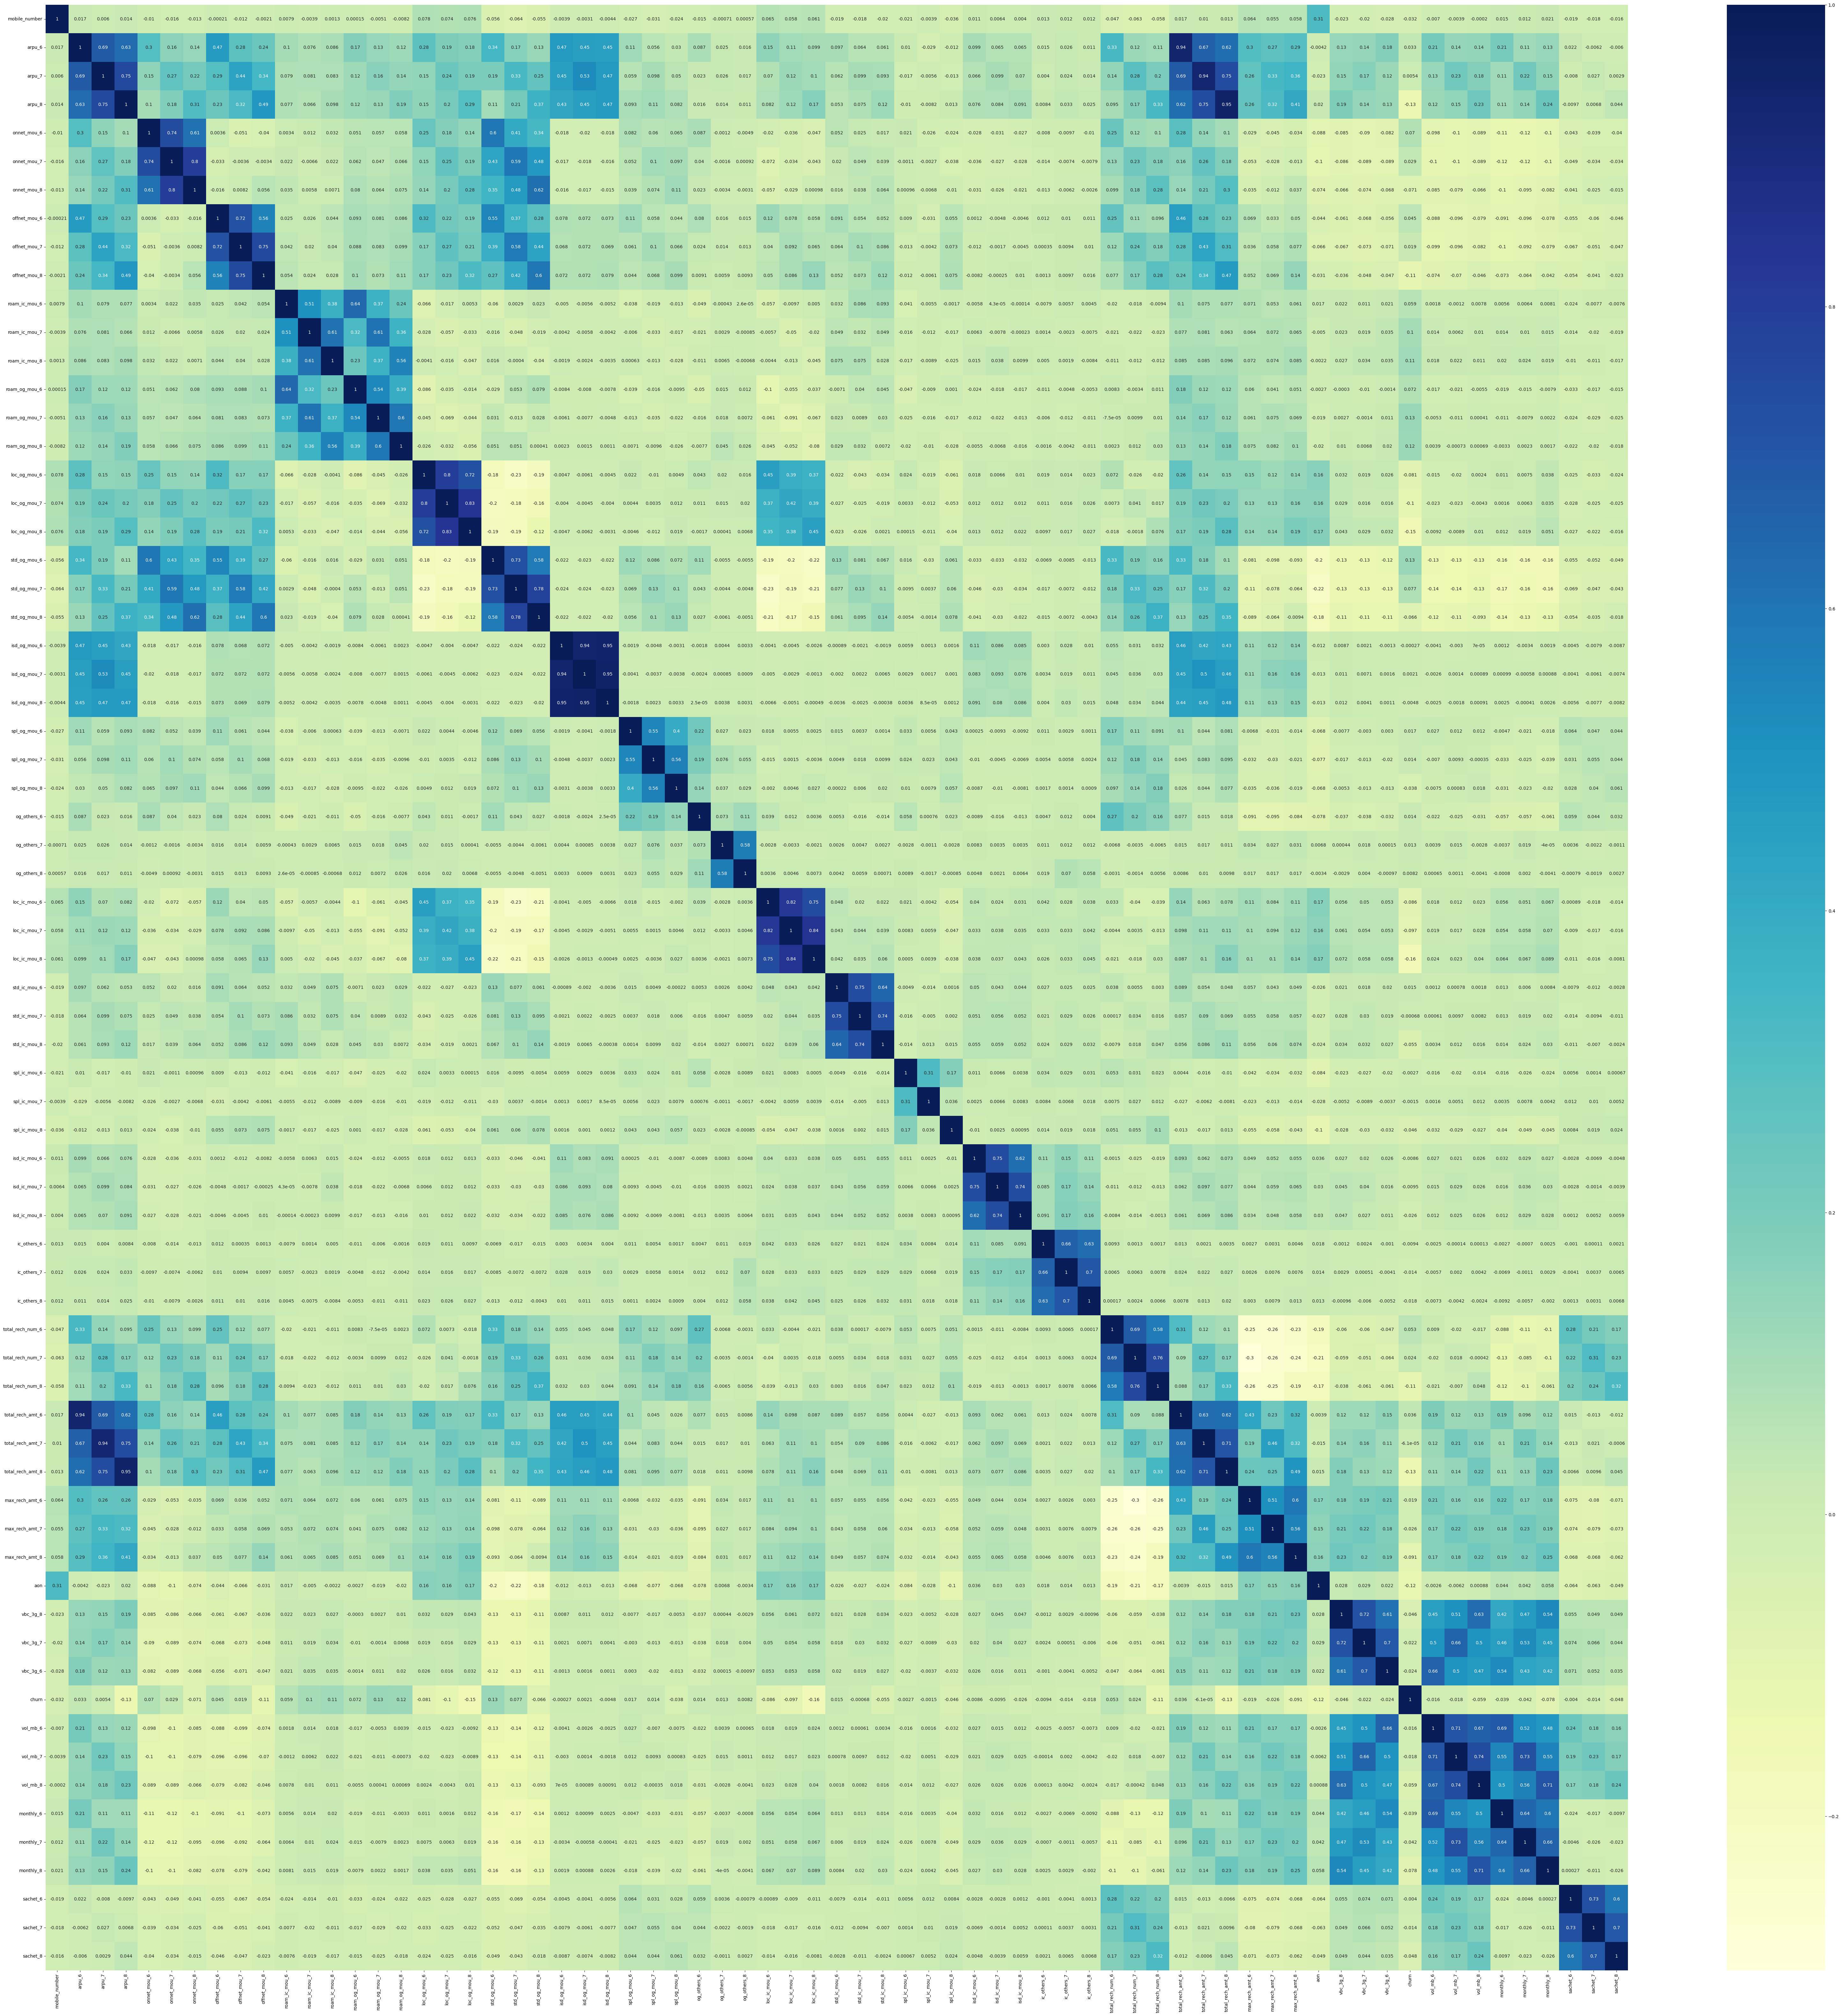

In [39]:
plt.figure(figsize=(80,80))
sns.heatmap(tele_df_1.corr(),cmap="YlGnBu", annot=True)

From the heatmap observe that some features like 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'arpu_6', 'arpu_7', and 'arpu_8' are highly correlated. During PCA we will handle this multicolinearity.

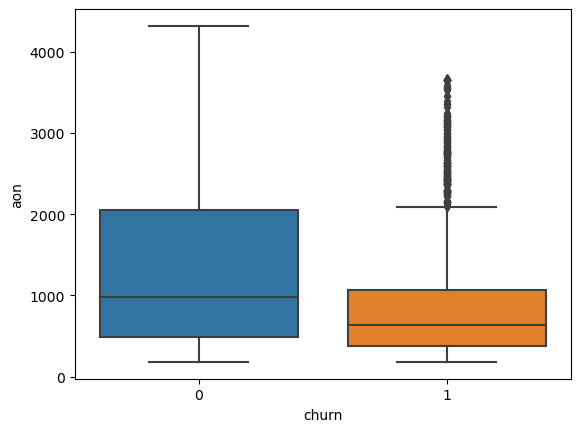

In [40]:
sns.boxplot(x = tele_df_1.churn, y = tele_df_1.aon)

plt.show()

### Inferences:
#### From the bargraph, it is clearly visible that the users who have joined the industry recently are more likely to churn. The churning decreases as the customer retains in the network. So, company needs to focus on retaining the customers those are using the network for a long period and also plan for some offers and discounts to retain the recently joined customers.

The average revenue per user in good phase of customer (first two months) is given by arpu_6 and arpu_7. Take an average of these two and drop the other columns.

In [41]:
tele_df_1["avg_arpu"]= (tele_df_1['arpu_6']+tele_df_1['arpu_7'])/2
tele_df_1['avg_arpu'].head()

7     1209.5150
8      435.4720
13     349.2585
16     365.4220
17     354.4940
Name: avg_arpu, dtype: float64

In [42]:
# Lets drop the original columns as they are derived to a new column for better understanding of the data

tele_df_1.drop(['arpu_6','arpu_7'], axis=1, inplace=True)


# The curent dimension of the dataset after dropping few unwanted columns
tele_df_1.shape

(28861, 68)

Text(0.5, 1.0, 'Features Correlating with Churn variable')

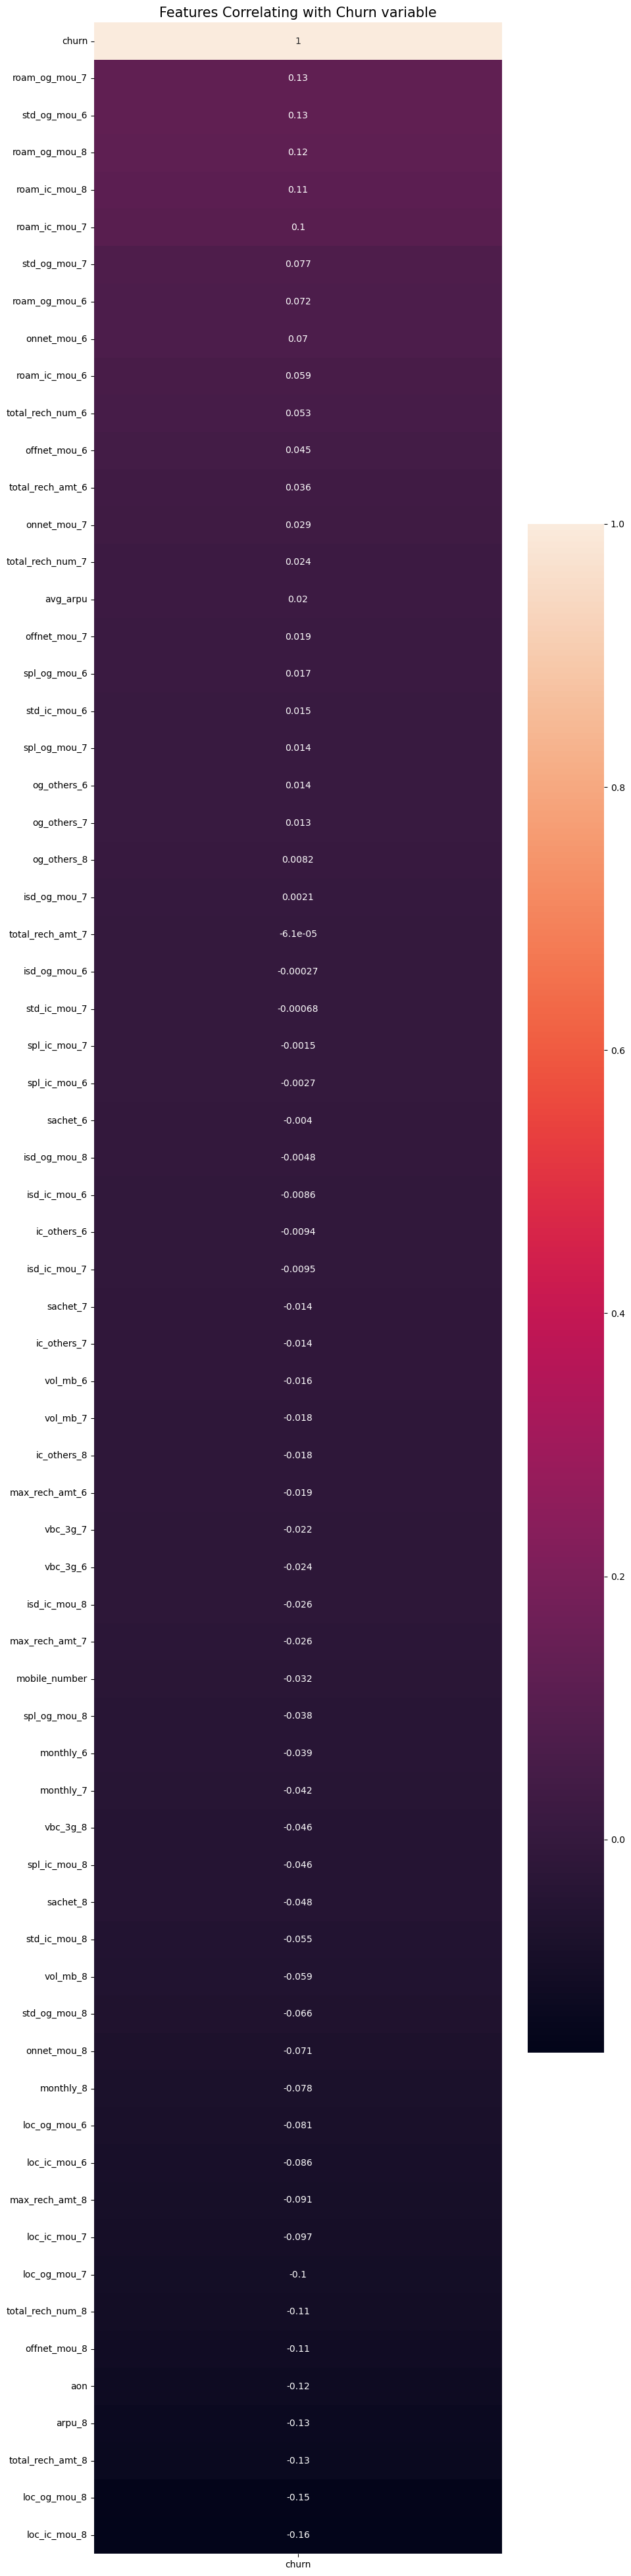

In [43]:
# Checking Correlation between target variable(SalePrice) with the other variable in the dataset
plt.figure(figsize=(10,50))
heatmap_churn = sns.heatmap(tele_df_1.corr()[['churn']].sort_values(ascending=False, by='churn'),annot=True)
heatmap_churn.set_title("Features Correlating with Churn variable", fontsize=15)

#### Average revenue for month 8 has negative correlation with churn.
#### Average roaming and outgoing calls for 6 & 7th months are positively correlated with churn.

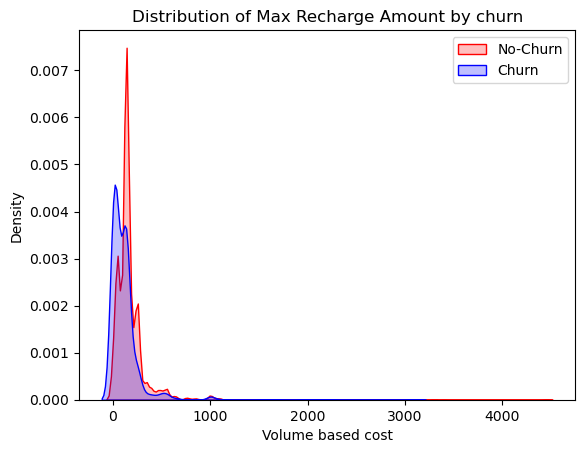

In [44]:
# Plot churn vs max recharge amount
ax = sns.kdeplot(tele_df_1.max_rech_amt_8[(tele_df_1["churn"] == 0)],
                color="Red", shade = True)
ax = sns.kdeplot(tele_df_1.max_rech_amt_8[(tele_df_1["churn"] == 1)],
                ax =ax, color="Blue", shade= True)
ax.legend(["No-Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Volume based cost')
ax.set_title('Distribution of Max Recharge Amount by churn')
plt.show()

## 5) Preparation for model building

### Test-train split

In [45]:
# Putting feature variable to X. We don't need mobile number for training the data, hence removing it here
X = tele_df_1.drop(['churn','mobile_number'],axis=1)

# Putting response variable to y
y = tele_df_1['churn']

y.head()

7     1
8     0
13    0
16    0
17    0
Name: churn, dtype: int64

In [46]:
# Splitting the data into train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)
print("Dimension of X_train:", X_train.shape)
print("Dimension of X_test:", X_test.shape)

Dimension of X_train: (20202, 66)
Dimension of X_test: (8659, 66)


In [47]:
num_col = X_train.select_dtypes(include = ['int64','float64']).columns.tolist()

In [48]:
# Normalisation using data scaling

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train[num_col] = scaler.fit_transform(X_train[num_col])

In [49]:
X_train.head()

arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
72061  0.047421     0.006631     0.017674     0.005175      0.051276   
94791  0.020889     0.004384     0.001812     0.000996      0.104607   
72241  0.051681     0.002637     0.001619     0.006404      0.009213   
72140  0.035842     0.011836     0.010435     0.011935      0.006800   
45212  0.039385     0.009170     0.011779     0.009117      0.079186   

       offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
72061      0.048844      0.026638            0.0       0.000000   
94791      0.074737      0.009294            0.0       0.002801   
72241      0.009525      0.003510            0.0       0.000000   
72140      0.003376      0.001696            0.0       0.000000   
45212      0.050378      0.039227            0.0       0.030470   

       roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
72061        0.00000            0.0       0.000000       0.000000   
94791        0.01326            0.0       0.001913       0.026399   
72241        0.00000            0.0       0.000000       0.000000   
72140        0.00000            0.0       0.000000       0.000000   
45212        0.00000            0.0       0.012585       0.000000   

       loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_mou_6  std_og_mou_7  \
72061      0.028265      0.059491      0.031008      0.020573      0.014609   
94791      0.002005      0.004214      0.000000      0.104140      0.063301   
72241      0.004013      0.005359      0.009174      0.006153      0.005866   
72140      0.013103      0.014950      0.013776      0.000045      0.000000   
45212      0.065391      0.066765      0.054260      0.003616      0.001878   

       std_og_mou_8  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  spl_og_mou_6  \
72061      0.006183      0.000000      0.000000      0.000000      0.001182   
94791      0.000000      0.000000      0.000000      0.000000      0.007317   
72241      0.001197      0.003115      0.005138      0.003217      0.000197   
72140      0.000000      0.000000      0.000000      0.000000      0.000000   
45212      0.002999      0.000000      0.000000      0.000000      0.000000   

       spl_og_mou_7  spl_og_mou_8  og_others_6  og_others_7  og_others_8  \
72061      0.000444      0.000000          0.0          0.0          0.0   
94791      0.006425      0.000000          0.0          0.0          0.0   
72241      0.000000      0.000000          0.0          0.0          0.0   
72140      0.002693      0.000129          0.0          0.0          0.0   
45212      0.013099      0.004695          0.0          0.0          0.0   

       loc_ic_mou_6  loc_ic_mou_7  loc_ic_mou_8  std_ic_mou_6  std_ic_mou_7  \
72061      0.051271      0.053789      0.057222      0.001302      0.008528   
94791      0.004396      0.005290      0.000000      0.012004      0.012947   
72241      0.026266      0.024326      0.027726      0.019514      0.007317   
72140      0.020948      0.010030      0.011435      0.000289      0.000012   
45212      0.189420      0.176350      0.147324      0.008195      0.005331   

       std_ic_mou_8  spl_ic_mou_6  spl_ic_mou_7  spl_ic_mou_8  isd_ic_mou_6  \
72061      0.009548      0.027328      0.005157      0.109149      0.000000   
94791      0.000000      0.000000      0.000000      0.000000      0.000000   
72241      0.013987      0.000000      0.000000      0.000000      0.052503   
72140      0.000114      0.000000      0.000000      0.000000      0.000000   
45212      0.010169      0.015688      0.000000      0.000000      0.000000   

       isd_ic_mou_7  isd_ic_mou_8  ic_others_6  ic_others_7  ic_others_8  \
72061      0.002885      0.000976     0.000156     0.002473     0.000000   
94791      0.000000      0.000000     0.000000     0.000000     0.000000   
72241      0.035892      0.078444     0.138884     0.148194     0.000000   
72140      0.000000      0.000000     0.000000     0.000000     0.000000   
45212      0.000000  

In [50]:
X_train.shape

(20202, 66)

In [51]:
X_train_scaled = pd.DataFrame(X_train,columns=X.columns)

In [52]:
X_train_scaled.head()

arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
72061  0.047421     0.006631     0.017674     0.005175      0.051276   
94791  0.020889     0.004384     0.001812     0.000996      0.104607   
72241  0.051681     0.002637     0.001619     0.006404      0.009213   
72140  0.035842     0.011836     0.010435     0.011935      0.006800   
45212  0.039385     0.009170     0.011779     0.009117      0.079186   

       offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
72061      0.048844      0.026638            0.0       0.000000   
94791      0.074737      0.009294            0.0       0.002801   
72241      0.009525      0.003510            0.0       0.000000   
72140      0.003376      0.001696            0.0       0.000000   
45212      0.050378      0.039227            0.0       0.030470   

       roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
72061        0.00000            0.0       0.000000       0.000000   
94791        0.01326            0.0       0.001913       0.026399   
72241        0.00000            0.0       0.000000       0.000000   
72140        0.00000            0.0       0.000000       0.000000   
45212        0.00000            0.0       0.012585       0.000000   

       loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_mou_6  std_og_mou_7  \
72061      0.028265      0.059491      0.031008      0.020573      0.014609   
94791      0.002005      0.004214      0.000000      0.104140      0.063301   
72241      0.004013      0.005359      0.009174      0.006153      0.005866   
72140      0.013103      0.014950      0.013776      0.000045      0.000000   
45212      0.065391      0.066765      0.054260      0.003616      0.001878   

       std_og_mou_8  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  spl_og_mou_6  \
72061      0.006183      0.000000      0.000000      0.000000      0.001182   
94791      0.000000      0.000000      0.000000      0.000000      0.007317   
72241      0.001197      0.003115      0.005138      0.003217      0.000197   
72140      0.000000      0.000000      0.000000      0.000000      0.000000   
45212      0.002999      0.000000      0.000000      0.000000      0.000000   

       spl_og_mou_7  spl_og_mou_8  og_others_6  og_others_7  og_others_8  \
72061      0.000444      0.000000          0.0          0.0          0.0   
94791      0.006425      0.000000          0.0          0.0          0.0   
72241      0.000000      0.000000          0.0          0.0          0.0   
72140      0.002693      0.000129          0.0          0.0          0.0   
45212      0.013099      0.004695          0.0          0.0          0.0   

       loc_ic_mou_6  loc_ic_mou_7  loc_ic_mou_8  std_ic_mou_6  std_ic_mou_7  \
72061      0.051271      0.053789      0.057222      0.001302      0.008528   
94791      0.004396      0.005290      0.000000      0.012004      0.012947   
72241      0.026266      0.024326      0.027726      0.019514      0.007317   
72140      0.020948      0.010030      0.011435      0.000289      0.000012   
45212      0.189420      0.176350      0.147324      0.008195      0.005331   

       std_ic_mou_8  spl_ic_mou_6  spl_ic_mou_7  spl_ic_mou_8  isd_ic_mou_6  \
72061      0.009548      0.027328      0.005157      0.109149      0.000000   
94791      0.000000      0.000000      0.000000      0.000000      0.000000   
72241      0.013987      0.000000      0.000000      0.000000      0.052503   
72140      0.000114      0.000000      0.000000      0.000000      0.000000   
45212      0.010169      0.015688      0.000000      0.000000      0.000000   

       isd_ic_mou_7  isd_ic_mou_8  ic_others_6  ic_others_7  ic_others_8  \
72061      0.002885      0.000976     0.000156     0.002473     0.000000   
94791      0.000000      0.000000     0.000000     0.000000     0.000000   
72241      0.035892      0.078444     0.138884     0.148194     0.000000   
72140      0.000000      0.000000     0.000000     0.000000     0.000000   
45212      0.000000  

In [53]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    return fpr, tpr, thresholds

In [54]:
def getModelMetrics(actual_churn=False,pred_churn=False):
    confusion = metrics.confusion_matrix(actual_churn, pred_churn)
    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives

    print("Roc_auc_score : {}".format(metrics.roc_auc_score(actual_churn,pred_churn)))
    print('Sensitivity/Recall : {}'.format(TP / float(TP+FN)))
    print('Specificity: {}'.format(TN / float(TN+FP)))
    print('False Positive Rate: {}'.format(FP/ float(TN+FP)))
    print('Positive predictive value: {}'.format(TP / float(TP+FP)))
    print('Negative Predictive value: {}'.format(TN / float(TN+ FN)))
    print('sklearn precision score value: {}'.format(metrics.precision_score(actual_churn, pred_churn ))) 

In [55]:
def predictChurnWithProb(model,X,y,prob):
    pred_probs = model.predict_proba(X)[:,1]    
    y_df= pd.DataFrame({'churn':y, 'churn_Prob':pred_probs})
    y_df['final_predicted'] = y_df.churn_Prob.map( lambda x: 1 if x > prob else 0)
    getModelMetrics(y_df.churn,y_df.final_predicted)
    return y_df

In [56]:
def OptimalCutoff(df):
    numbers = [float(x)/10 for x in range(10)]
    for i in numbers:
        df[i] = df.churn_Prob.map( lambda x: 1 if x > i else 0)

    cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
    num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
    for i in num:
        cm1 = metrics.confusion_matrix(df.churn, df[i] )
        total1=sum(sum(cm1))
        accuracy = (cm1[0,0]+cm1[1,1])/total1
        
        speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
        sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
        cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
    print(cutoff_df)
    cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
    plt.show()

In [57]:
def modelfit(alg, X_train, y_train, performCV=True, cv_folds=5):
    alg.fit(X_train, y_train)        
    dtrain_predictions = alg.predict(X_train)
    dtrain_predprob = alg.predict_proba(X_train)[:,1]

    if performCV:
        cv_score = cross_val_score(alg, X_train, y_train, cv=cv_folds, scoring='roc_auc')
    
    print ("\nModel Report")
    print ("Accuracy : %.4g" % metrics.roc_auc_score(y_train, dtrain_predictions))
    print ("Recall/Sensitivity : %.4g" % metrics.recall_score(y_train, dtrain_predictions))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(y_train, dtrain_predprob))
    
    if performCV:
        print ("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
        

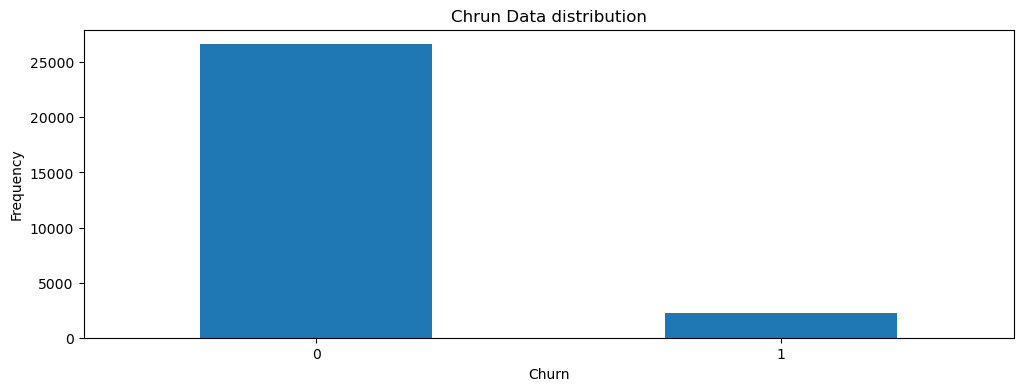

In [58]:
##Plotting bar plot to see the imbalance in the data set
plt.figure(figsize = (12,4))

pd.value_counts(tele_df_1['churn'],sort=True).plot(kind='bar',rot=0)
plt.title('Chrun Data distribution')
plt.xlabel('Churn')
plt.ylabel('Frequency')
plt.show()

There is a huge class imbalance clearely seen from the above box plot. Use the cross validation scheme to fix the class imbalance.

### Fixing class imbalance

In [59]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train_sm,y_train_sm = sm.fit_resample(X_train,y_train)

In [60]:
print("X_train_sm Shape:", X_train_sm.shape)
print("y_train_sm Shape:", y_train_sm.shape)

X_train_sm Shape: (37240, 66)
y_train_sm Shape: (37240,)


In [61]:
#Improting the PCA module
pca = PCA(svd_solver='randomized', random_state=100)

In [62]:
#Doing the PCA on the train data
pca.fit(X_train_sm)

PCA(random_state=100, svd_solver='randomized')

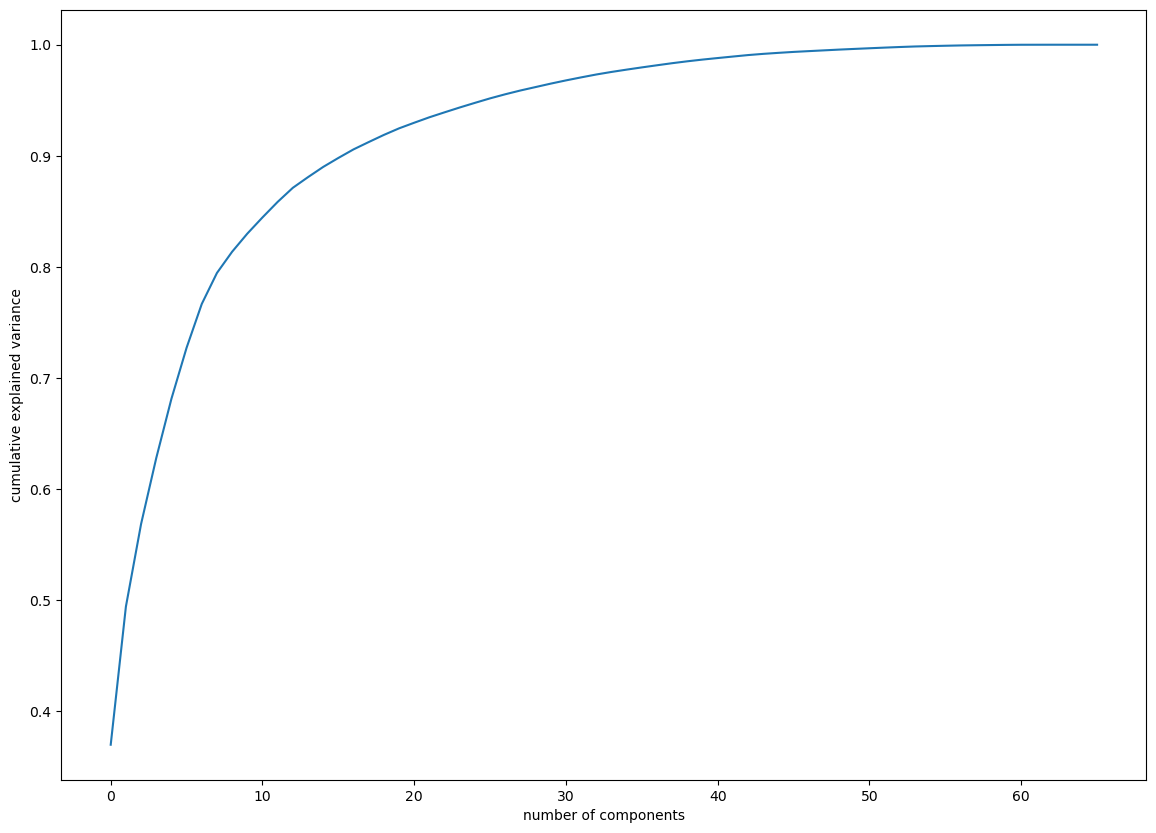

In [63]:
#Plotting scree plot 
%matplotlib inline
fig = plt.figure(figsize = (14,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [64]:
#Using incremental PCA for efficiency
pca_final = IncrementalPCA(n_components=30)

In [65]:
X_train_pca = pca_final.fit_transform(X_train_sm)
X_train_pca.shape


(37240, 30)

In [66]:
#Applying selected 30 components to the test data
X_test_pca = pca_final.transform(X_test)
X_test_pca.shape

(8659, 30)

For the prediction of churned customers, fit variety of models and select the one best predictor of churn. 
Models trained are, 
1. Logistic Regression 
2. Random Forest

## Model 1: Logistic Regression

In [67]:
# Importing necessary libraries for Model creation
import statsmodels.api as sm

In [68]:
# Logistic regression model
logm1 = sm.GLM(y_train_sm,(sm.add_constant(X_train_sm)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                37240
Model:                            GLM   Df Residuals:                    37173
Model Family:                Binomial   Df Model:                           66
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16449.
Date:                Tue, 04 Jun 2024   Deviance:                       32899.
Time:                        18:36:07   Pearson chi2:                 7.01e+09
No. Iterations:                     9   Pseudo R-squ. (CS):             0.3952
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.2553      0.199     -1.282      0.200      -0.646       0.135
arpu_8              22.4642      2.817      7.975      0.000      16.943      27.985
onnet_mou_6       -115.8108     23.163     -5.000      0.000    -161.210     -70.412
onnet_mou_7         33.4994     22.556      1.485      0.137     -10.709      77.708
onnet_mou_8        -35.9925     27.051     -1.331      0.183     -89.011      17.026
offnet_mou_6      -141.8706     27.618     -5.137      0.000    -196.001     -87.740
offnet_mou_7        41.5361     26.692      1.556      0.120     -10.779      93.851
offnet_mou_8       -41.8983     35.230     -1.189      0.234    -110.948      27.151
roam_ic_mou_6        1.2834      0.792      1.621      0.105      -0.268       2.835
roam_ic_mou_7        4.6692      1.291      3.617      0.000       2.139       7.199
roam_ic_mou_8       -0.7128      1.270     -0.561      0.575      -3.202       1.776
roam_og_mou_6       62.3744     12.503      4.989      0.000      37.870      86.879
roam_og_mou_7       -5.5046      7.803     -0.705      0.481     -20.799       9.790
roam_og_mou_8       26.7922     13.488      1.986      0.047       0.357      53.227
loc_og_mou_6       178.7918     35.204      5.079      0.000     109.794     247.790
loc_og_mou_7       -26.5869     21.244     -1.251      0.211     -68.225      15.051
loc_og_mou_8        11.5025     27.844      0.413      0.680     -43.070      66.075
std_og_mou_6       142.6655     27.884      5.116      0.000      88.013     197.318
std_og_mou_7       -37.0238     30.226     -1.225      0.221     -96.267      22.219
std_og_mou_8        29.4923     35.194      0.838      0.402     -39.486      98.471
isd_og_mou_6        49.7047     19.402      2.562      0.010      11.677      87.733
isd_og_mou_7        78.0562     15.957      4.892      0.000      46.781     109.332
isd_og_mou_8       -23.1072     16.439     -1.406      0.160     -55.326       9.112
spl_og_mou_6         8.9708      2.559      3.506      0.000       3.956      13.986
spl_og_mou_7        -3.3092      2.857     -1.158      0.247      -8.908       2.290
spl_og_mou_8        -1.9981      3.310     -0.604      0.546      -8.485       4.488
og_others_6         -2.6093      0.786     -3.321      0.001      -4.149      -1.069
og_others_7         -8.2926      4.914     -1.688      0.092     -17.924       1.339
og_others_8        -81.4178     30.088     -2.706      0.007    -140.390     -22.446
loc_ic_mou_6         0.2820      0.847      0.333      0.739      -1.378       1.942
loc_ic_mou_7        20.0744      1.043     19.252      0.000      18.031      22.118
loc_ic_mou_8       -40.5544      1.250    -32.454      0.000     -43.004     -38.105
std_ic_mou_6         5.8003      1.165      4.977      0.000       3.516       8.084
std_ic_mou_7         1.

### Logistic Regression using Recursive feature elimination (RFE method)

In [69]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE

# running RFE with 20 variables as output
rfe = RFE(logreg,n_features_to_select=20)             
rfe = rfe.fit(X_train_sm, y_train_sm)

In [70]:
rfe.support_

array([ True, False, False,  True, False, False,  True, False, False,
        True, False,  True,  True, False, False,  True, False,  True,
        True, False, False, False, False, False, False, False, False,
       False, False,  True,  True, False, False,  True, False, False,
        True, False, False, False, False, False, False, False,  True,
        True, False, False,  True, False, False, False, False, False,
       False, False, False,  True, False, False, False,  True, False,
       False,  True,  True])

In [71]:
rfe_columns=X_train_sm.columns[rfe.support_]
print("The selected columns by RFE for modelling are: \n\n",rfe_columns)

The selected columns by RFE for modelling are: 

 Index(['arpu_8', 'onnet_mou_8', 'offnet_mou_8', 'roam_ic_mou_8',
       'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_mou_8', 'std_og_mou_7',
       'std_og_mou_8', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_mou_8',
       'spl_ic_mou_8', 'total_rech_num_7', 'total_rech_num_8',
       'total_rech_amt_8', 'vol_mb_7', 'monthly_8', 'sachet_8', 'avg_arpu'],
      dtype='object')


In [72]:
list(zip(X_train_sm.columns, rfe.support_, rfe.ranking_))

[('arpu_8', True, 1),
 ('onnet_mou_6', False, 4),
 ('onnet_mou_7', False, 23),
 ('onnet_mou_8', True, 1),
 ('offnet_mou_6', False, 40),
 ('offnet_mou_7', False, 5),
 ('offnet_mou_8', True, 1),
 ('roam_ic_mou_6', False, 31),
 ('roam_ic_mou_7', False, 10),
 ('roam_ic_mou_8', True, 1),
 ('roam_og_mou_6', False, 44),
 ('roam_og_mou_7', True, 1),
 ('roam_og_mou_8', True, 1),
 ('loc_og_mou_6', False, 25),
 ('loc_og_mou_7', False, 37),
 ('loc_og_mou_8', True, 1),
 ('std_og_mou_6', False, 18),
 ('std_og_mou_7', True, 1),
 ('std_og_mou_8', True, 1),
 ('isd_og_mou_6', False, 26),
 ('isd_og_mou_7', False, 8),
 ('isd_og_mou_8', False, 22),
 ('spl_og_mou_6', False, 11),
 ('spl_og_mou_7', False, 39),
 ('spl_og_mou_8', False, 3),
 ('og_others_6', False, 14),
 ('og_others_7', False, 35),
 ('og_others_8', False, 29),
 ('loc_ic_mou_6', False, 30),
 ('loc_ic_mou_7', True, 1),
 ('loc_ic_mou_8', True, 1),
 ('std_ic_mou_6', False, 21),
 ('std_ic_mou_7', False, 34),
 ('std_ic_mou_8', True, 1),
 ('spl_ic_mou_

### Assessing the model with StatsModels

In [73]:
X_train_SM = sm.add_constant(X_train_sm[rfe_columns])
logm2 = sm.GLM(y_train_sm,X_train_SM, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                37240
Model:                            GLM   Df Residuals:                    37219
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -17070.
Date:                Tue, 04 Jun 2024   Deviance:                       34140.
Time:                        18:36:36   Pearson chi2:                 3.23e+10
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3747
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1337      0.082      1.632      0.103      -0.027       0.294
arpu_8               3.8489      2.185      1.762      0.078      -0.433       8.131
onnet_mou_8         -2.4918      7.185     -0.347      0.729     -16.574      11.591
offnet_mou_8        -0.7791      9.353     -0.083      0.934     -19.111      17.553
roam_ic_mou_8        3.5342      1.064      3.321      0.001       1.448       5.620
roam_og_mou_7        5.3376      0.538      9.928      0.000       4.284       6.391
roam_og_mou_8       10.4194      3.593      2.900      0.004       3.378      17.461
loc_og_mou_8       -16.5612      7.290     -2.272      0.023     -30.848      -2.274
std_og_mou_7         7.3400      0.512     14.338      0.000       6.337       8.343
std_og_mou_8       -10.7970      9.263     -1.166      0.244     -28.952       7.358
loc_ic_mou_7        21.0601      0.817     25.763      0.000      19.458      22.662
loc_ic_mou_8       -44.7705      1.214    -36.883      0.000     -47.150     -42.391
std_ic_mou_8       -14.3698      1.067    -13.467      0.000     -16.461     -12.278
spl_ic_mou_8       -20.1815      1.263    -15.973      0.000     -22.658     -17.705
total_rech_num_7     3.2168      0.356      9.026      0.000       2.518       3.915
total_rech_num_8    -6.2543      0.664     -9.412      0.000      -7.557      -4.952
total_rech_amt_8   -20.8806      2.006    -10.410      0.000     -24.812     -16.949
vol_mb_7             4.5799      0.482      9.501      0.000       3.635       5.525
monthly_8          -12.2675      0.635    -19.320      0.000     -13.512     -11.023
sachet_8            -8.6942      0.622    -13.985      0.000      -9.913      -7.476
avg_arpu            11.9238      1.238      9.633      0.000       9.498      14.350
====================================================================================
"""

In [74]:
# From the p-value of the individual columns, 
    # we can drop the column 'offnet_mou_8' as it has high p-value of 0.93
rfe_columns_1=rfe_columns.drop('offnet_mou_8',1)
print("\nThe new set of edited features are:\n",rfe_columns_1)


The new set of edited features are:
 Index(['arpu_8', 'onnet_mou_8', 'roam_ic_mou_8', 'roam_og_mou_7',
       'roam_og_mou_8', 'loc_og_mou_8', 'std_og_mou_7', 'std_og_mou_8',
       'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_mou_8', 'spl_ic_mou_8',
       'total_rech_num_7', 'total_rech_num_8', 'total_rech_amt_8', 'vol_mb_7',
       'monthly_8', 'sachet_8', 'avg_arpu'],
      dtype='object')


In [75]:
# Training the model with the edited feature list
X_train_SM = sm.add_constant(X_train_sm[rfe_columns_1])
logm2 = sm.GLM(y_train_sm,X_train_SM, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                37240
Model:                            GLM   Df Residuals:                    37220
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -17070.
Date:                Tue, 04 Jun 2024   Deviance:                       34140.
Time:                        18:36:36   Pearson chi2:                 3.26e+10
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3747
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1349      0.081      1.669      0.095      -0.024       0.293
arpu_8               3.8159      2.148      1.776      0.076      -0.395       8.027
onnet_mou_8         -1.8956      0.628     -3.019      0.003      -3.126      -0.665
roam_ic_mou_8        3.5365      1.064      3.324      0.001       1.451       5.622
roam_og_mou_7        5.3385      0.538      9.931      0.000       4.285       6.392
roam_og_mou_8       10.1380      1.221      8.300      0.000       7.744      12.532
loc_og_mou_8       -17.1606      1.158    -14.813      0.000     -19.431     -14.890
std_og_mou_7         7.3410      0.512     14.345      0.000       6.338       8.344
std_og_mou_8       -11.5638      1.017    -11.369      0.000     -13.557      -9.570
loc_ic_mou_7        21.0602      0.817     25.763      0.000      19.458      22.662
loc_ic_mou_8       -44.7693      1.214    -36.886      0.000     -47.148     -42.390
std_ic_mou_8       -14.3691      1.067    -13.467      0.000     -16.460     -12.278
spl_ic_mou_8       -20.1841      1.263    -15.980      0.000     -22.660     -17.709
total_rech_num_7     3.2164      0.356      9.026      0.000       2.518       3.915
total_rech_num_8    -6.2535      0.664     -9.412      0.000      -7.556      -4.951
total_rech_amt_8   -20.8827      2.006    -10.412      0.000     -24.814     -16.952
vol_mb_7             4.5812      0.482      9.509      0.000       3.637       5.525
monthly_8          -12.2600      0.628    -19.508      0.000     -13.492     -11.028
sachet_8            -8.6936      0.622    -13.985      0.000      -9.912      -7.475
avg_arpu            11.9146      1.232      9.668      0.000       9.499      14.330
====================================================================================
"""

In [76]:
# From the p-value of the individual columns, 
    # we can drop the column 'arpu_8' as it has high p-value of 0.80
rfe_columns_2=rfe_columns_1.drop('arpu_8',1)
print("\nThe new set of edited features are:\n",rfe_columns_2)


The new set of edited features are:
 Index(['onnet_mou_8', 'roam_ic_mou_8', 'roam_og_mou_7', 'roam_og_mou_8',
       'loc_og_mou_8', 'std_og_mou_7', 'std_og_mou_8', 'loc_ic_mou_7',
       'loc_ic_mou_8', 'std_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_7',
       'total_rech_num_8', 'total_rech_amt_8', 'vol_mb_7', 'monthly_8',
       'sachet_8', 'avg_arpu'],
      dtype='object')


In [77]:
# Training the model with the edited feature list
X_train_SM = sm.add_constant(X_train_sm[rfe_columns_2])
logm2 = sm.GLM(y_train_sm,X_train_SM, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                37240
Model:                            GLM   Df Residuals:                    37221
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -17072.
Date:                Tue, 04 Jun 2024   Deviance:                       34144.
Time:                        18:36:37   Pearson chi2:                 4.47e+10
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3746
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1578      0.081      1.957      0.050      -0.000       0.316
onnet_mou_8         -1.9361      0.627     -3.088      0.002      -3.165      -0.707
roam_ic_mou_8        3.5999      1.064      3.383      0.001       1.514       5.686
roam_og_mou_7        5.2560      0.536      9.814      0.000       4.206       6.306
roam_og_mou_8       10.4814      1.209      8.669      0.000       8.112      12.851
loc_og_mou_8       -16.7240      1.133    -14.765      0.000     -18.944     -14.504
std_og_mou_7         7.2340      0.508     14.229      0.000       6.238       8.230
std_og_mou_8       -11.1471      0.992    -11.237      0.000     -13.091      -9.203
loc_ic_mou_7        20.9801      0.816     25.706      0.000      19.380      22.580
loc_ic_mou_8       -44.6623      1.211    -36.867      0.000     -47.037     -42.288
std_ic_mou_8       -14.2290      1.063    -13.383      0.000     -16.313     -12.145
spl_ic_mou_8       -20.2159      1.264    -16.000      0.000     -22.692     -17.739
total_rech_num_7     3.1945      0.356      8.966      0.000       2.496       3.893
total_rech_num_8    -6.1990      0.664     -9.333      0.000      -7.501      -4.897
total_rech_amt_8   -18.2908      1.374    -13.313      0.000     -20.984     -15.598
vol_mb_7             4.5819      0.483      9.493      0.000       3.636       5.528
monthly_8          -12.1170      0.624    -19.409      0.000     -13.341     -10.893
sachet_8            -8.6700      0.622    -13.947      0.000      -9.888      -7.452
avg_arpu            12.4388      1.207     10.305      0.000      10.073      14.804
====================================================================================
"""

In [78]:
# Getting the predicted values on the train set
y_train_sm_pred = res.predict(X_train_SM)
y_train_sm_pred = y_train_sm_pred.values.reshape(-1)
y_train_sm_pred[:10]

array([0.01074268, 0.88079215, 0.20738178, 0.48147175, 0.03984743,
       0.58588219, 0.0166176 , 0.22868245, 0.03432716, 0.52178831])

### Creating a dataframe with the actual churn flag and the predicted probabilities

In [79]:
y_train_sm_pred_final = pd.DataFrame({'Converted':y_train_sm.values, 'Converted_prob':y_train_sm_pred})
y_train_sm_pred_final.head()

Converted  Converted_prob
0          0        0.010743
1          0        0.880792
2          0        0.207382
3          0        0.481472
4          0        0.039847

Creating new column 'churn_pred' with 1 if Churn_Prob > 0.5 else 0

In [82]:
y_train_sm_pred_final['churn_pred'] = y_train_sm_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Viewing the prediction results
y_train_sm_pred_final.head()

Converted  Converted_prob  churn_pred
0          0        0.010743           0
1          0        0.880792           1
2          0        0.207382           0
3          0        0.481472           0
4          0        0.039847           0

In [83]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final.churn_pred )
print(confusion)

[[14619  4001]
 [ 3212 15408]]


In [84]:
# Checking the overall accuracy.
print("Accuracy:",metrics.accuracy_score(y_train_sm_pred_final.Converted, y_train_sm_pred_final.churn_pred))

Accuracy: 0.8063104189044039


In [85]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [86]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_sm[rfe_columns_2].columns
vif['VIF'] = [variance_inflation_factor(X_train_sm[rfe_columns].values, i) for i in range(X_train_sm[rfe_columns_2].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
8       loc_ic_mou_8  315.02
2      roam_og_mou_7  234.24
1      roam_ic_mou_8  188.39
6       std_og_mou_8  108.83
0        onnet_mou_8   41.74
5       std_og_mou_7   19.77
15         monthly_8   18.94
13  total_rech_amt_8    6.78
14          vol_mb_7    6.52
10      spl_ic_mou_8    4.90
9       std_ic_mou_8    4.60
7       loc_ic_mou_7    4.31
4       loc_og_mou_8    2.29
17          avg_arpu    1.91
16          sachet_8    1.73
3      roam_og_mou_8    1.51
11  total_rech_num_7    1.16
12  total_rech_num_8    1.05

#### Calculate sensitivity, specificity, precision, FPR

In [87]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [88]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity = ",TP / float(TP+FN))

# Let us calculate specificity
print("Specificity = ",TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False Positive Rate = ",FP/ float(TN+FP))

# positive predictive value 
print ("Precision = ",TP / float(TP+FP))

# Negative predictive value
print ("True Negative Prediction Rate = ",TN / float(TN+ FN))

Sensitivity =  0.8274973147153598
Specificity =  0.7851235230934479
False Positive Rate =  0.2148764769065521
Precision =  0.7938585192436498
True Negative Prediction Rate =  0.8198642813078346


#### Plot the ROC curve

In [89]:
# Defining a function to plot the roc curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Prediction Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [90]:
# Defining the variables to plot the curve
fpr, tpr, thresholds = metrics.roc_curve( y_train_sm_pred_final.Converted, y_train_sm_pred_final.Converted_prob, drop_intermediate = False )

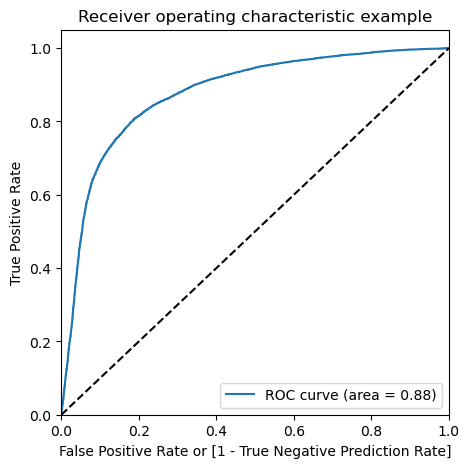

In [91]:
# Plotting the curve for the obtained metrics
draw_roc(y_train_sm_pred_final.Converted, y_train_sm_pred_final.Converted_prob)

#### Optimal cut-off point

In [92]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_sm_pred_final[i]= y_train_sm_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_sm_pred_final.head()

Converted  Converted_prob  churn_pred  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0          0        0.010743           0    1    0    0    0    0    0    0   
1          0        0.880792           1    1    1    1    1    1    1    1   
2          0        0.207382           0    1    1    1    0    0    0    0   
3          0        0.481472           0    1    1    1    1    1    0    0   
4          0        0.039847           0    1    0    0    0    0    0    0   

   0.7  0.8  0.9  
0    0    0    0  
1    1    1    0  
2    0    0    0  
3    0    0    0  
4    0    0    0

In [93]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.500000     1.000000     0.000000
0.1          0.1  0.637594     0.977444     0.297744
0.2          0.2  0.704431     0.955532     0.453330
0.3          0.3  0.752148     0.924919     0.579377
0.4          0.4  0.784882     0.882599     0.687164
0.5          0.5  0.806310     0.827497     0.785124
0.6          0.6  0.804619     0.746079     0.863158
0.7          0.7  0.781203     0.644361     0.918045
0.8          0.8  0.701101     0.448067     0.954135
0.9          0.9  0.570623     0.158432     0.982814


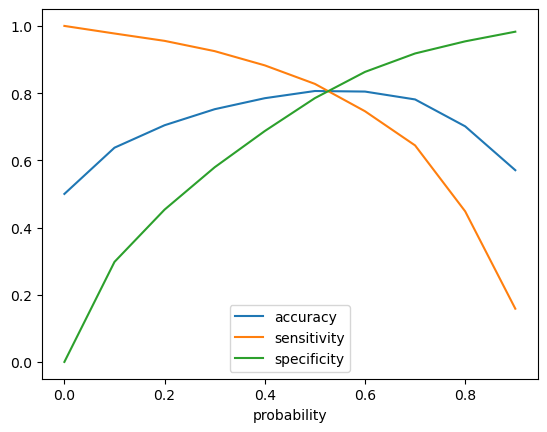

In [94]:
# plotting accuracy sensitivity and specificity for various probabilities calculated above.
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

From the above graph, we can see the optimum cutoff is slightly higher than 0.5 but lies lower than 0.6. Lets check for the range 0.5 to 0.6.

In [95]:
# Let's create columns with refined probability cutoffs 
numbers = [0.50,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59]
for i in numbers:
    y_train_sm_pred_final[i]= y_train_sm_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_sm_pred_final.head()

Converted  Converted_prob  churn_pred  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0          0        0.010743           0    1    0    0    0    0    0    0   
1          0        0.880792           1    1    1    1    1    1    1    1   
2          0        0.207382           0    1    1    1    0    0    0    0   
3          0        0.481472           0    1    1    1    1    1    0    0   
4          0        0.039847           0    1    0    0    0    0    0    0   

   0.7  0.8  0.9  0.51  0.52  0.53  0.54  0.55  0.56  0.57  0.58  0.59  
0    0    0    0     0     0     0     0     0     0     0     0     0  
1    1    1    0     1     1     1     1     1     1     1     1     1  
2    0    0    0     0     0     0     0     0     0     0     0     0  
3    0    0    0     0     0     0     0     0     0     0     0     0  
4    0    0    0     0     0     0     0     0     0     0     0     0

In [96]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.50,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

      probability  accuracy  sensitivity  specificity
0.50         0.50  0.806310     0.827497     0.785124
0.51         0.51  0.806982     0.820677     0.793287
0.52         0.52  0.808083     0.814125     0.802041
0.53         0.53  0.809184     0.807358     0.811010
0.54         0.54  0.808888     0.798872     0.818904
0.55         0.55  0.808190     0.789313     0.827068
0.56         0.56  0.808110     0.781740     0.834479
0.57         0.57  0.806767     0.772395     0.841139
0.58         0.58  0.805908     0.763588     0.848228
0.59         0.59  0.805693     0.755747     0.855639


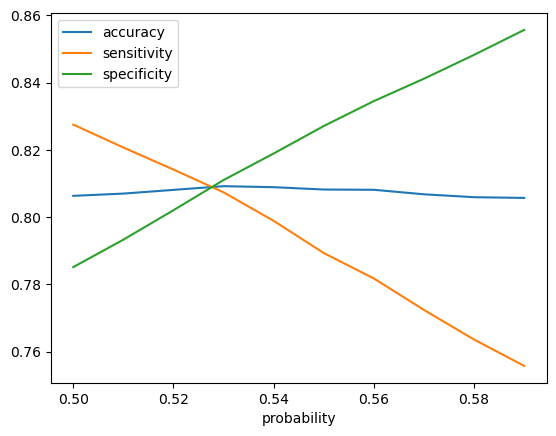

In [97]:
# plotting accuracy sensitivity and specificity for various probabilities calculated above.
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

In [98]:
#### From the curve above, 0.2 is the optimum point to take it as a cutoff probability.

y_train_sm_pred_final['final_churn_pred'] = y_train_sm_pred_final.Converted_prob.map( lambda x: 1 if x > 0.53 else 0)

y_train_sm_pred_final.head()

Converted  Converted_prob  churn_pred  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0          0        0.010743           0    1    0    0    0    0    0    0   
1          0        0.880792           1    1    1    1    1    1    1    1   
2          0        0.207382           0    1    1    1    0    0    0    0   
3          0        0.481472           0    1    1    1    1    1    0    0   
4          0        0.039847           0    1    0    0    0    0    0    0   

   0.7  0.8  0.9  0.51  0.52  0.53  0.54  0.55  0.56  0.57  0.58  0.59  \
0    0    0    0     0     0     0     0     0     0     0     0     0   
1    1    1    0     1     1     1     1     1     1     1     1     1   
2    0    0    0     0     0     0     0     0     0     0     0     0   
3    0    0    0     0     0     0     0     0     0     0     0     0   
4    0    0    0     0     0     0     0     0     0     0     0     0   

   final_churn_pred  
0                 0  
1                 1  
2                 0  
3                 0  
4                 0

In [99]:
# Calculating the ovearall accuracy again
print("The overall accuracy of the model now is:",metrics.accuracy_score(y_train_sm_pred_final.Converted, y_train_sm_pred_final.final_churn_pred))

The overall accuracy of the model now is: 0.8091836734693878


In [100]:
confusion2 = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final.final_churn_pred )
print(confusion2)

[[15101  3519]
 [ 3587 15033]]


In [101]:
TP2 = confusion2[1,1] # true positive 
TN2 = confusion2[0,0] # true negatives
FP2 = confusion2[0,1] # false positives
FN2 = confusion2[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print("Sensitivity = ",TP2 / float(TP2+FN2))

# Let us calculate specificity
print("Specificity = ",TN2 / float(TN2+FP2))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False Positive Rate = ",FP2/ float(TN2+FP2))

# positive predictive value 
print ("Precision = ",TP2 / float(TP2+FP2))

# Negative predictive value
print ("True Negative Prediction Rate = ",TN2 / float(TN2 + FN2))

Sensitivity =  0.8073576799140709
Specificity =  0.8110096670247047
False Positive Rate =  0.18899033297529538
Precision =  0.8103169469598965
True Negative Prediction Rate =  0.808058647260274


### Precision and recall tradeoff

In [102]:
from sklearn.metrics import precision_recall_curve

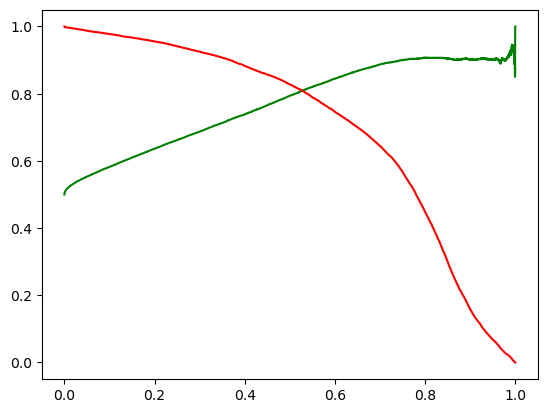

In [103]:
p, r, thresholds = precision_recall_curve(y_train_sm_pred_final.Converted, y_train_sm_pred_final.Converted_prob)

# Plotting the curve
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Making predictions on the test set

In [104]:
# Scaling the test data
X_test[num_col] = scaler.transform(X_test[num_col])
X_test.head()

arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
154    0.095178     0.086739     0.081012     0.054576      0.247470   
71708  0.041313     0.021741     0.021818     0.018840      0.053093   
16070  0.042750     0.047038     0.113289     0.073475      0.002277   
40228  0.059843     0.012343     0.009217     0.005302      0.045997   
27754  0.024115     0.013248     0.014944     0.004337      0.011380   

       offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
154        0.266153      0.120525       0.003467       0.000000   
71708      0.041342      0.015809       0.000000       0.000000   
16070      0.002194      0.005224       0.000000       0.000000   
40228      0.060161      0.050321       0.056396       0.030409   
27754      0.022593      0.007750       0.003781       0.036095   

       roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
154          0.00170       0.013931       0.000000       0.019320   
71708        0.00000       0.000000       0.000000       0.000000   
16070        0.00000       0.000000       0.000000       0.000000   
40228        0.05058       0.119130       0.159343       0.140169   
27754        0.00000       0.001274       0.041984       0.000000   

       loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_mou_6  std_og_mou_7  \
154        0.043293      0.050183      0.022590      0.255365      0.260469   
71708      0.052417      0.072114      0.035507      0.004555      0.002131   
16070      0.000422      0.004236      0.001242      0.040832      0.083470   
40228      0.000706      0.005562      0.000000      0.001654      0.015177   
27754      0.011249      0.011113      0.012806      0.007529      0.012523   

       std_og_mou_8  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  spl_og_mou_6  \
154        0.137522           0.0           0.0           0.0      0.013180   
71708      0.002291           0.0           0.0           0.0      0.009374   
16070      0.060766           0.0           0.0           0.0      0.000000   
40228      0.000986           0.0           0.0           0.0      0.000000   
27754      0.000907           0.0           0.0           0.0      0.000000   

       spl_og_mou_7  spl_og_mou_8  og_others_6  og_others_7  og_others_8  \
154        0.000000      0.000000     0.000000          0.0          0.0   
71708      0.006656      0.003746     0.138455          0.0          0.0   
16070      0.000000      0.000000     0.000000          0.0          0.0   
40228      0.000000      0.000000     0.000000          0.0          0.0   
27754      0.000000      0.000870     0.000000          0.0          0.0   

       loc_ic_mou_6  loc_ic_mou_7  loc_ic_mou_8  std_ic_mou_6  std_ic_mou_7  \
154        0.043392      0.036272      0.031561      0.157967      0.094794   
71708      0.076678      0.077882      0.080175      0.004966      0.004253   
16070      0.002323      0.005341      0.003745      0.000130      0.000157   
40228      0.000128      0.004529      0.000000      0.000293      0.001281   
27754      0.017863      0.014357      0.015008      0.004896      0.001168   

       std_ic_mou_8  spl_ic_mou_6  spl_ic_mou_7  spl_ic_mou_8  isd_ic_mou_6  \
154        0.099660       0.00000      0.000000      0.000000      0.000000   
71708      0.008221       0.00000      0.000000      0.000000      0.000000   
16070      0.000127       0.00000      0.000000      0.000000      0.004193   
40228      0.000343       0.00000      0.000000      0.000000      0.000000   
27754      0.001063       0.00253      0.002813      0.016051      0.000000   

       isd_ic_mou_7  isd_ic_mou_8  ic_others_6  ic_others_7  ic_others_8  \
154        0.000000           0.0     0.014396          0.0     0.000000   
71708      0.000427           0.0     0.001897          0.0     0.005521   
16070      0.004780           0.0     0.000000          0.0     0.000000   
40228      0.000000           0.0     0.000000          0.0     0.000000   
27754      0.000000  

In [105]:
# Feature selection
X_test=X_test[rfe_columns_2]
X_test.head()

onnet_mou_8  roam_ic_mou_8  roam_og_mou_7  roam_og_mou_8  loc_og_mou_8  \
154       0.054576        0.00170       0.000000       0.019320      0.022590   
71708     0.018840        0.00000       0.000000       0.000000      0.035507   
16070     0.073475        0.00000       0.000000       0.000000      0.001242   
40228     0.005302        0.05058       0.159343       0.140169      0.000000   
27754     0.004337        0.00000       0.041984       0.000000      0.012806   

       std_og_mou_7  std_og_mou_8  loc_ic_mou_7  loc_ic_mou_8  std_ic_mou_8  \
154        0.260469      0.137522      0.036272      0.031561      0.099660   
71708      0.002131      0.002291      0.077882      0.080175      0.008221   
16070      0.083470      0.060766      0.005341      0.003745      0.000127   
40228      0.015177      0.000986      0.004529      0.000000      0.000343   
27754      0.012523      0.000907      0.014357      0.015008      0.001063   

       spl_ic_mou_8  total_rech_num_7  total_rech_num_8  total_rech_amt_8  \
154        0.000000          0.028986          0.035714          0.092736   
71708      0.000000          0.043478          0.020408          0.024215   
16070      0.000000          0.079710          0.076531          0.030507   
40228      0.000000          0.043478          0.051020          0.055197   
27754      0.016051          0.079710          0.030612          0.013218   

       vol_mb_7  monthly_8  sachet_8  avg_arpu  
154         0.0        0.0       0.0  0.151078  
71708       0.0        0.0       0.0  0.077766  
16070       0.0        0.0       0.0  0.069503  
40228       0.0        0.0       0.0  0.081180  
27754       0.0        0.0       0.0  0.072400

In [106]:
# Adding constant to the test model.
X_test_SM = sm.add_constant(X_test)

In [107]:
y_test_pred = res.predict(X_test_SM)
print("\n The first ten probability value of the prediction are:\n",y_test_pred[:10])


 The first ten probability value of the prediction are:
 154      0.144525
71708    0.118198
16070    0.487751
40228    0.933891
27754    0.562506
89051    0.348927
17529    0.047089
38837    0.603590
51380    0.055972
65518    0.591542
dtype: float64


In [108]:
y_pred = pd.DataFrame(y_test_pred)
y_pred.head()

0
154    0.144525
71708  0.118198
16070  0.487751
40228  0.933891
27754  0.562506

In [109]:
y_pred=y_pred.rename(columns = {0:"Conv_prob"})

In [110]:
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

churn
154        0
71708      0
16070      0
40228      0
27754      0

In [111]:
y_pred_final = pd.concat([y_test_df,y_pred],axis=1)
y_pred_final.head()

churn  Conv_prob
154        0   0.144525
71708      0   0.118198
16070      0   0.487751
40228      0   0.933891
27754      0   0.562506

In [112]:
y_pred_final['test_churn_pred'] = y_pred_final.Conv_prob.map(lambda x: 1 if x>0.53 else 0)
y_pred_final.head()

churn  Conv_prob  test_churn_pred
154        0   0.144525                0
71708      0   0.118198                0
16070      0   0.487751                0
40228      0   0.933891                1
27754      0   0.562506                1

In [113]:
# Checking the overall accuracy of the predicted set.
metrics.accuracy_score(y_pred_final.churn, y_pred_final.test_churn_pred)

0.8144127497401548

### Metrics Evaluation

In [114]:
# Confusion Matrix
confusion2_test = metrics.confusion_matrix(y_pred_final.churn, y_pred_final.test_churn_pred)
print("Confusion Matrix\n",confusion2_test)

Confusion Matrix
 [[6529 1471]
 [ 136  523]]


In [115]:
# Calculating model validation parameters
TP3 = confusion2_test[1,1] # true positive 
TN3 = confusion2_test[0,0] # true negatives
FP3 = confusion2_test[0,1] # false positives
FN3 = confusion2_test[1,0] # false negatives

In [116]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity = ",TP3 / float(TP3+FN3))

# Let us calculate specificity
print("Specificity = ",TN3 / float(TN3+FP3))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False Positive Rate = ",FP3/ float(TN3+FP3))

# positive predictive value 
print ("Precision = ",TP3 / float(TP3+FP3))

# Negative predictive value
print ("True Negative Prediction Rate = ",TN3 / float(TN3+FN3))

Sensitivity =  0.7936267071320182
Specificity =  0.816125
False Positive Rate =  0.183875
Precision =  0.2622868605817452
True Negative Prediction Rate =  0.9795948987246812


### Explaining the results

In [117]:
print("Predicted model accuracy: ",round(metrics.accuracy_score(y_pred_final.churn, y_pred_final.test_churn_pred),2)*100,"%")
print("Predicted model sensitivity: ",round(TP3 / float(TP3+FN3),2)*100,"%")

print("\nthe True positive rate is given more importance as the actual and prediction of churn by a customer\n")

The accuracy of the predicted model is:  81.0 %
The sensitivity of the predicted model is:  79.0 %

As the model created is based on a sentivity model, i.e. the True positive rate is given more importance as the actual and prediction of churn by a customer



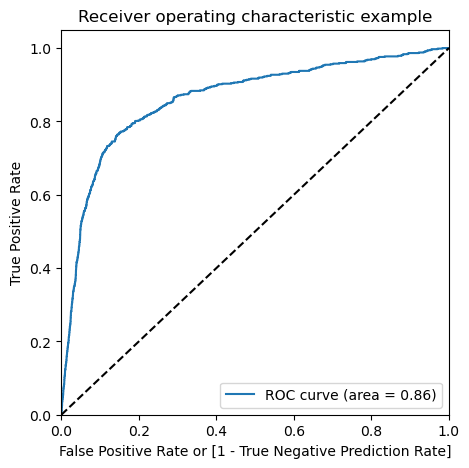

In [118]:
# ROC curve for the test dataset

# Defining the variables to plot the curve
fpr, tpr, thresholds = metrics.roc_curve(y_pred_final.churn,y_pred_final.Conv_prob, drop_intermediate = False )
# Plotting the curve for the obtained metrics
draw_roc(y_pred_final.churn,y_pred_final.Conv_prob)

#### AUC score for train dataset is 0.88 and the test dataset is 0.86. This model is a better model.

### Logistic Regression using PCA

In [119]:
# split the dateset into train and test datasets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)
print("Dimension of X_train:", X_train.shape)
print("Dimension of X_test:", X_test.shape)

# apply scaling on the dataset

scaler = MinMaxScaler()
X_train[num_col] = scaler.fit_transform(X_train[num_col])
X_test[num_col] = scaler.transform(X_test[num_col])

# Applying SMOTE technique for data imbalance correction

sm = SMOTE(random_state=42)
X_train_sm,y_train_sm = sm.fit_resample(X_train,y_train)
print("Dimension of X_train_sm Shape:", X_train_sm.shape)
print("Dimension of y_train_sm Shape:", y_train_sm.shape)

X_train_sm.head()

Dimension of X_train: (20202, 66)
Dimension of X_test: (8659, 66)
Dimension of X_train_sm Shape: (37240, 66)
Dimension of y_train_sm Shape: (37240,)


arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0  0.047421     0.006631     0.017674     0.005175      0.051276   
1  0.020889     0.004384     0.001812     0.000996      0.104607   
2  0.051681     0.002637     0.001619     0.006404      0.009213   
3  0.035842     0.011836     0.010435     0.011935      0.006800   
4  0.039385     0.009170     0.011779     0.009117      0.079186   

   offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0      0.048844      0.026638            0.0       0.000000        0.00000   
1      0.074737      0.009294            0.0       0.002801        0.01326   
2      0.009525      0.003510            0.0       0.000000        0.00000   
3      0.003376      0.001696            0.0       0.000000        0.00000   
4      0.050378      0.039227            0.0       0.030470        0.00000   

   roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_mou_6  loc_og_mou_7  \
0            0.0       0.000000       0.000000      0.028265      0.059491   
1            0.0       0.001913       0.026399      0.002005      0.004214   
2            0.0       0.000000       0.000000      0.004013      0.005359   
3            0.0       0.000000       0.000000      0.013103      0.014950   
4            0.0       0.012585       0.000000      0.065391      0.066765   

   loc_og_mou_8  std_og_mou_6  std_og_mou_7  std_og_mou_8  isd_og_mou_6  \
0      0.031008      0.020573      0.014609      0.006183      0.000000   
1      0.000000      0.104140      0.063301      0.000000      0.000000   
2      0.009174      0.006153      0.005866      0.001197      0.003115   
3      0.013776      0.000045      0.000000      0.000000      0.000000   
4      0.054260      0.003616      0.001878      0.002999      0.000000   

   isd_og_mou_7  isd_og_mou_8  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  \
0      0.000000      0.000000      0.001182      0.000444      0.000000   
1      0.000000      0.000000      0.007317      0.006425      0.000000   
2      0.005138      0.003217      0.000197      0.000000      0.000000   
3      0.000000      0.000000      0.000000      0.002693      0.000129   
4      0.000000      0.000000      0.000000      0.013099      0.004695   

   og_others_6  og_others_7  og_others_8  loc_ic_mou_6  loc_ic_mou_7  \
0          0.0          0.0          0.0      0.051271      0.053789   
1          0.0          0.0          0.0      0.004396      0.005290   
2          0.0          0.0          0.0      0.026266      0.024326   
3          0.0          0.0          0.0      0.020948      0.010030   
4          0.0          0.0          0.0      0.189420      0.176350   

   loc_ic_mou_8  std_ic_mou_6  std_ic_mou_7  std_ic_mou_8  spl_ic_mou_6  \
0      0.057222      0.001302      0.008528      0.009548      0.027328   
1      0.000000      0.012004      0.012947      0.000000      0.000000   
2      0.027726      0.019514      0.007317      0.013987      0.000000   
3      0.011435      0.000289      0.000012      0.000114      0.000000   
4      0.147324      0.008195      0.005331      0.010169      0.015688   

   spl_ic_mou_7  spl_ic_mou_8  isd_ic_mou_6  isd_ic_mou_7  isd_ic_mou_8  \
0      0.005157      0.109149      0.000000      0.002885      0.000976   
1      0.000000      0.000000      0.000000      0.000000      0.000000   
2      0.000000      0.000000      0.052503      0.035892      0.078444   
3      0.000000      0.000000      0.000000      0.000000      0.000000   
4      0.000000      0.000000      0.000000      0.000000      0.000000   

   ic_others_6  ic_others_7  ic_others_8  total_rech_num_6  total_rech_num_7  \
0     0.000156     0.002473     0.000000          0.039088          0.079710   
1     0.000000     0.000000     0.000000          0.016287          0.043478   
2     0.138884     0.148194     0.000000          0.022801          0.057971   
3     0.000000     0.000000     0.000000          0.042345          0.065217   
4     0.001421     0.

In [120]:
# importing PCA
from sklearn.decomposition import PCA
pca = PCA(random_state=42)

# applying PCA on train data
pca.fit(X_train_sm)

PCA(random_state=42)

In [121]:
X_train_sm_pca=pca.fit_transform(X_train_sm)
print("Dimension of X_train_sm_pca: ",X_train_sm_pca.shape)

X_test_pca=pca.transform(X_test)
print("Dimension of X_test_pca: ",X_test_pca.shape)

Dimension of X_train_sm_pca:  (37240, 66)
Dimension of X_test_pca:  (8659, 66)


In [122]:
#Viewing the PCA components
pca.components_

array([[ 1.28059898e-02, -4.56567230e-02, -4.00226895e-02, ...,
        -8.37552102e-03, -7.17110134e-04, -2.43683515e-03],
       [ 3.36161487e-02,  3.57001326e-01,  3.01538916e-01, ...,
        -2.12975259e-02, -1.08880986e-02,  7.11065984e-02],
       [ 1.48920834e-01,  5.25423007e-02,  7.62968693e-02, ...,
         3.56052861e-02,  3.51017124e-02,  1.37512282e-01],
       ...,
       [ 3.79693320e-03, -1.72715118e-01, -3.02131182e-01, ...,
         2.25164973e-04,  5.20746895e-04, -7.22725302e-03],
       [-5.12369543e-04, -2.83817660e-01,  2.78468553e-01, ...,
        -2.09731526e-04, -6.90759888e-05, -8.34472842e-04],
       [-2.26564798e-03,  1.71725278e-01,  1.28563717e-01, ...,
        -1.90190255e-04,  1.08563760e-04,  5.02670818e-04]])

### Performing Logistic Regression

In [123]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg_pca = LogisticRegression()
logreg_pca.fit(X_train_sm_pca, y_train_sm)

# making the predictions
y_pred = logreg_pca.predict(X_test_pca)

# converting the prediction into a dataframe
y_pred_df = pd.DataFrame(y_pred)
print("Dimension of y_pred_df:", y_pred_df.shape)

Dimension of y_pred_df: (8659, 1)


In [124]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Checking the Confusion matrix
print("Confusion Matirx for y_test & y_pred\n",confusion_matrix(y_test,y_pred),"\n")

# Checking the Accuracy of the Predicted model.
print("Accuracy of the logistic regression model with PCA: ",accuracy_score(y_test,y_pred))

Confusion Matirx for y_test & y_pred
 [[6369 1631]
 [ 125  534]] 

Accuracy of the logistic regression model with PCA:  0.7972052200023098


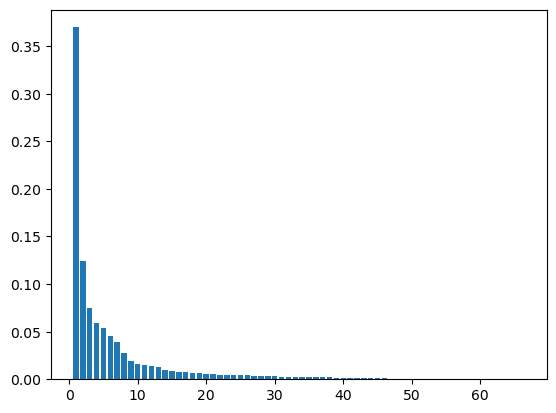

In [125]:
plt.bar(range(1,len(pca.explained_variance_ratio_)+1),pca.explained_variance_ratio_)
plt.show()

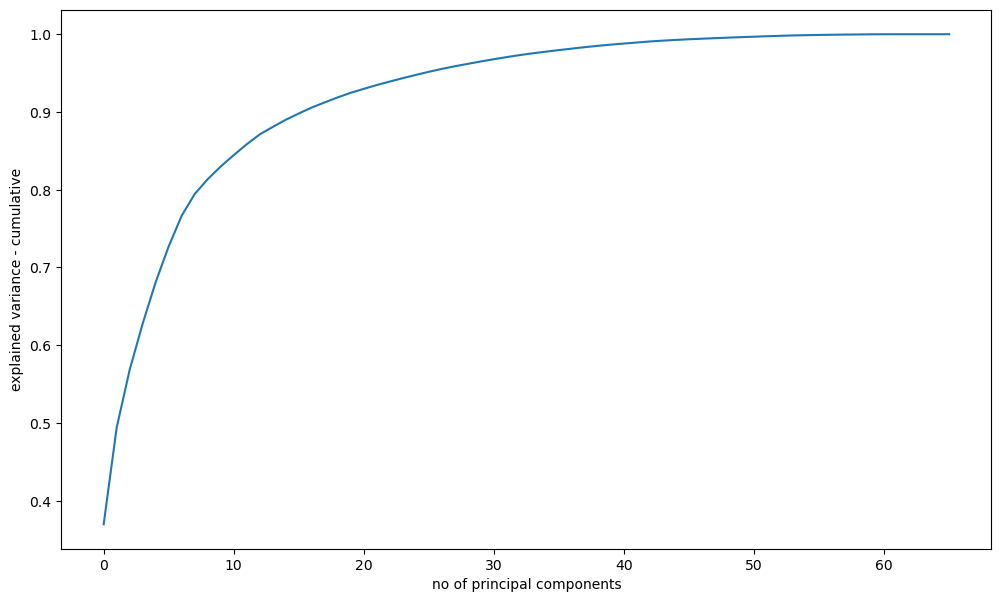

In [127]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

# Making a scree plot
fig = plt.figure(figsize=[12,7])
plt.plot(var_cumu)
plt.xlabel('no of principal components')
plt.ylabel('explained variance - cumulative')
plt.show()

In [128]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)

array([37. , 49.4, 56.8, 62.7, 68. , 72.6, 76.5, 79.3, 81.2, 82.8, 84.3,
       85.7, 87. , 88. , 88.9, 89.7, 90.5, 91.2, 91.8, 92.4, 92.9, 93.4,
       93.8, 94.2, 94.6, 95. , 95.4, 95.7, 96. , 96.3, 96.6, 96.9, 97.2,
       97.4, 97.6, 97.8, 98. , 98.2, 98.4, 98.6, 98.7, 98.8, 98.9, 99. ,
       99.1, 99.2, 99.3, 99.4, 99.5, 99.6, 99.7, 99.8, 99.9, 99.9, 99.9,
       99.9, 99.9, 99.9, 99.9, 99.9, 99.9, 99.9, 99.9, 99.9, 99.9, 99.9])

*90% of the data can be explained with 8 PCA components

#### Fitting the dataset with the 8 explainable components

In [129]:
pca_8 = PCA(n_components=15)

train_pca_8 = pca_8.fit_transform(X_train_sm)
print("Dimension for Train dataset using PCA: ", train_pca_8.shape)

test_pca_8 = pca_8.transform(X_test)
print("Dimension for Test dataset using PCA: ", test_pca_8.shape)

Dimension for Train dataset using PCA:  (37240, 15)
Dimension for Test dataset using PCA:  (8659, 15)


In [130]:
logreg_pca_8 = LogisticRegression()
logreg_pca_8.fit(train_pca_8, y_train_sm)

# making the predictions
y_pred_8 = logreg_pca_8.predict(test_pca_8)

# converting the prediction into a dataframe
y_pred_df_8 = pd.DataFrame(y_pred_8)
print("Dimension of y_pred_df_8: ", y_pred_df_8.shape)

Dimension of y_pred_df_8:  (8659, 1)


In [131]:
# Checking the Confusion matrix
print("Confusion Matirx for y_test & y_pred\n",confusion_matrix(y_test,y_pred_8),"\n")

# Checking the Accuracy of the Predicted model.
print("Accuracy of the logistic regression model with PCA: ",accuracy_score(y_test,y_pred_8))

Confusion Matirx for y_test & y_pred
 [[6340 1660]
 [ 149  510]] 

Accuracy of the logistic regression model with PCA:  0.7910844208338146


## Model 2: Random Forest

In [135]:
def plot_traintestAcc(score,param):
    scores = score
    # plotting accuracies with max_depth
    plt.figure()
    plt.plot(scores["param_"+param], 
    scores["mean_train_score"], 
    label="training accuracy")
    plt.plot(scores["param_"+param], 
    scores["mean_test_score"], 
    label="test accuracy")
    plt.xlabel(param)
    plt.ylabel("f1")
    plt.legend()
    plt.show()

In [136]:
# Tuning Max_depth
parameters = {'max_depth': range(10, 30, 5)}
ran1 = RandomForestClassifier()
rfgs = GridSearchCV(ran1, parameters,  cv=5,  scoring="f1",return_train_score=True)
rfgs.fit(X_train_pca,y_train_sm)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(10, 30, 5)},
             return_train_score=True, scoring='f1')

In [137]:
scores = rfgs.cv_results_
print(scores)

{'mean_fit_time': array([ 72.42874064,  93.47205195, 102.70395827, 105.94781637]), 'std_fit_time': array([1.09924235, 1.33787851, 1.57707077, 1.87766979]), 'mean_score_time': array([0.4027288 , 0.53963866, 0.60113959, 0.60380068]), 'std_score_time': array([0.03407399, 0.08031299, 0.02651971, 0.02994932]), 'param_max_depth': masked_array(data=[10, 15, 20, 25],
             mask=[False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'max_depth': 10}, {'max_depth': 15}, {'max_depth': 20}, {'max_depth': 25}], 'split0_test_score': array([0.87695809, 0.93839111, 0.94936209, 0.94802111]), 'split1_test_score': array([0.88157547, 0.93058112, 0.94314734, 0.94323607]), 'split2_test_score': array([0.88431945, 0.93550914, 0.94696671, 0.94934037]), 'split3_test_score': array([0.88451894, 0.93213025, 0.94330169, 0.9478422 ]), 'split4_test_score': array([0.8788042 , 0.93550093, 0.94700491, 0.95046605]), 'mean_test_score': array([0.88123523, 0.93442251, 0.94595655, 

In [138]:
max_depth = scores["param_max_depth"].tolist()
train_mean_score = scores["mean_train_score"].tolist()
test_mean_score = scores["mean_test_score"].tolist()

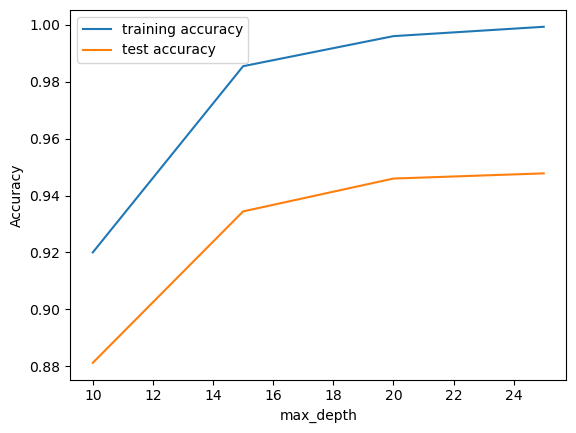

In [139]:
# plotting accuracies after tuning Random forest  max_depth
plt.figure()
plt.plot(max_depth, train_mean_score,label="training accuracy")
plt.plot(max_depth, test_mean_score, label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [151]:
#Tuning n-estimator
parameters = {'n_estimators': range(40, 140, 35)}
ran2= RandomForestClassifier(max_depth=20,random_state=10)
rfgs = GridSearchCV(ran2, parameters,  cv=3,  scoring="recall",return_train_score=True)

In [152]:
rfgs.fit(X_train_pca,y_train_sm)

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(max_depth=20, random_state=10),
             param_grid={'n_estimators': range(40, 140, 35)},
             return_train_score=True, scoring='recall')

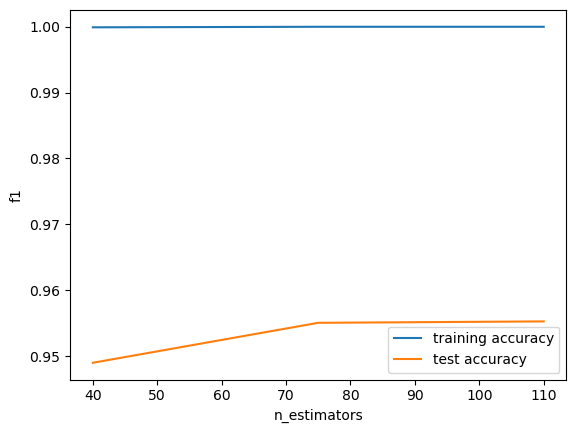

In [153]:
plot_traintestAcc(rfgs.cv_results_,'n_estimators')

In [154]:
# tuning max features
parameters = {'max_features': [4, 8, 14, 20, 24]}
ran3 = RandomForestClassifier(max_depth=20,n_estimators=80,random_state=10)
rfgs = GridSearchCV(ran3, parameters,  cv=5, scoring="f1")

In [155]:
#Tuning min sample leaf
parameters = {'min_samples_leaf': range(100, 400, 50)}
ran4 = RandomForestClassifier(max_depth=20,n_estimators=80,max_features=5,random_state=10)
rfgs = GridSearchCV(ran4, parameters, cv=3, scoring="f1")

In [156]:
rfgs.fit(X_train_pca,y_train_sm)

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(max_depth=20, max_features=5,
                                              n_estimators=80,
                                              random_state=10),
             param_grid={'min_samples_leaf': range(100, 400, 50)},
             scoring='f1')

In [168]:
# Tuning min sample split
parameters = {'min_samples_split': range(50, 300, 50)}
ran5 = RandomForestClassifier(max_depth=20,n_estimators=80,max_features=5,min_samples_leaf=100,random_state=10)
rfgs = GridSearchCV(ran5, parameters, cv=3, scoring="f1")

In [169]:
rfgs.fit(X_train_pca,y_train_sm)

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(max_depth=20, max_features=5,
                                              min_samples_leaf=100,
                                              n_estimators=80,
                                              random_state=10),
             param_grid={'min_samples_split': range(50, 300, 50)},
             scoring='f1')

In [170]:
random_forest_final = RandomForestClassifier(max_depth=20,n_estimators=80,max_features=5,min_samples_leaf=100,min_samples_split=150,random_state=10)

In [171]:
print("Train data model performance-")
modelfit(random_forest_final,X_train_pca,y_train_sm)

Train data model performance-

Model Report
Accuracy : 0.8506
Recall/Sensitivity : 0.8354
AUC Score (Train): 0.927526
CV Score : Mean - 0.9059438 | Std - 0.00368638 | Min - 0.8997237 | Max - 0.9102643


In [ ]:
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 120 candidates, totalling 480 fits


In [ ]:
grid_search.best_score_

In [ ]:
print("Model performance on Test data:")
getModelMetrics(y_test,predictions)

In [ ]:
# predicting churn with default cut-off 0.5
cut_off_prob=0.5
y_train_df = predictChurnWithProb(random_forest_final,X_train_pca,y_train_sm,cut_off_prob)
y_train_df.head()

In [ ]:
# finding cut-off with the right balance of the metrices
OptimalCutoff(y_train_df)

In [ ]:
cut_off_prob=0.5
predictChurnWithProb(random_forest_final,X_train_pca,y_train_sm,cut_off_prob).head()

In [ ]:
# Making prediction on test set
y_test_df= predictChurnWithProb(random_forest_final,X_test_pca,y_test,cut_off_prob)
y_test_df.head()

# Model Selection
#### Using the models understand that the most important business metric for the telecom churn problem is recall. Churning cost is much higher than having some false positive. The logistic regression model with probability cut-off = 0.5 performs best. It achieved the best recall accuracy of 79.10% for test data. Also the overall accuracy and specificity is consistent for Test and train data, thus avoiding overfitting. The precision is compromised in this effort but the business objective to predict Churn customers is most accuratety captured by it.

In [ ]:
# Create a based model
params = {
    'max_depth' : [2,3,5,10,20],
    'min_samples_leaf' : [5,10, 20, 50, 100, 200],
    'n_estimators' : [10, 25, 50, 100]
}

In [ ]:
# Create the parameter grid based on the results of random search 
rf = RandomForestClassifier(random_state = 100000000, n_jobs=-1)


In [ ]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = params, cv = 4, n_jobs = 1, verbose = 1, scoring = "accuracy")

In [ ]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

In [ ]:
# checking Optimal accuracy score
print(grid_search.best_score_)

In [ ]:
# Hyperparameters
print(grid_search.best_params_)

In [ ]:
rf_best = grid_search.best_estimator_
rf_best

In [ ]:
rf_best.feature_importances_

In [ ]:
grid_search.best_score_

In [ ]:
imp_df = pd.DataFrame( {
    'Varname' : X_train.columns,
    'Imp' : rf_best.feature_importances_
})

In [ ]:
imp_df.sort_values(by = "Imp", ascending = False)

In the above table, top 8 features are from the action phase that is the 8th month. Clearely, we can conclude that the effect of activities in the action phase has a direct impact on the high value customer churn.

loc_og_mou_8
loc_ic_mou_8
total_rech_amt_8
roam_ic_mou_8
arpu_8
roam_og_mou_8
std_ic_mou_8
offnet_mou_8

## Predictions:
### The high value churner's local incoming and outgoing usage was more than that of non-churners, but the churning rate is dropped with the tenure or age of network means the churning reduces as the customer is older in the network.

### The Network operators must investigate roaming tariffs or services as it is one of the important features observed in the churned customers.     

## Business solutions:

### The high value churner's local incoming and outgoing usage was more than that of non-churners, but the churning rate is dropped with the tenure or age of network means the churning reduces as the customer is older in the network.
### The Network operators must investigate roaming tariffs or services as it is one of the important features observed in the churned customers.     